## 1. 데이터 불러오기


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/태풍/typhoon_data.csv', encoding = 'cp949')

In [ ]:
data.to_csv('/content/drive/MyDrive/태풍/print_data2.csv')

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/태풍/print_data2.csv')

In [ ]:
data

,Unnamed: 0,Date,Latitude(N),Longitude(E),Central Pressure,M/s,Km/s,Wind radius,Itnensity,Size,Direction,Speed,70% Chance radius,name
0,0,2011-09-07,21.5,135.4,1000.0,18.0,65.0,100.0,1,1,NNE,15.0,0.0,typhoon_1
1,1,2011-09-07,21.5,135.3,1000.0,18.0,65.0,120.0,1,1,W,4.0,0.0,typhoon_1
2,2,2011-09-07,22.2,135.5,998.0,17.0,61.0,150.0,1,1,NNE,14.0,0.0,typhoon_1
3,3,2011-09-08,23.7,135.2,998.0,18.0,65.0,150.0,1,1,NNW,29.0,0.0,typhoon_1
4,4,2011-09-08,24.7,134.2,1000.0,18.0,65.0,150.0,1,1,NW,26.0,0.0,typhoon_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,9434,2011-09-05,36.5,148.7,994.0,21.0,76.0,250.0,1,1,NW,33.0,0.0,typhoon_529
9435,9435,2011-09-06,36.8,148.3,994.0,21.0,76.0,250.0,1,1,NW,9.0,0.0,typhoon_529
9436,9436,2011-09-06,37.9,149.4,994.0,21.0,76.0,250.0,1,1,NE,27.0,0.0,typhoon_529
9437,9437,2011-09-06,39.4,150.1,994.0,21.0,76.0,250.0,1,1,NNE,30.0,0.0,typhoon_529


In [ ]:
data.columns

Index(['Unnamed: 0', '일시', 'Unnamed: 1', '위도(N)', '경도(E)', '중심기압', '초속(m/s)',
       '시속(km/h)', '강풍반경(km)[예외반경]', '강도', '크기', '진행방향', '이동속도(km/h)',
       '70% 확률 반경(km)', 'name'],
      dtype='object')

In [ ]:
# 데이터에서 현재 데이터만 뽑아내기

data = data[data['Unnamed: 1']==0]

In [ ]:
# 필요없는 column 제거

data = data.drop(['Unnamed: 0'], axis = 1)

In [ ]:
# columns의 이름을 영어로 변경

data.rename(columns = {'일시' : 'Date', '위도(N)' : 'Latitude(N)', '경도(E)' : 'Longitude(E)', '중심기압' : 'Central Pressure', '초속(m/s)' : 'M/s', '시속(km/h)' : 'Km/s', '강풍반경(km)[예외반경]' : 'Wind radius', '강도' : 'Itnensity', '크기' : 'Size', '진행방향' : 'Direction', '이동속도(km/h)' : 'Speed', '70% 확률 반경(km)' : '70% Chance radius'}, inplace = True  )

In [ ]:
data.shape

(42457, 15)

In [ ]:
data.isnull().sum() / data.shape[0]

Unnamed: 0           0.0
Date                 0.0
Latitude(N)          0.0
Longitude(E)         0.0
Central Pressure     0.0
M/s                  0.0
Km/s                 0.0
Wind radius          0.0
Itnensity            0.0
Size                 0.0
Direction            0.0
Speed                0.0
70% Chance radius    0.0
name                 0.0
dtype: float64

In [ ]:
data.shape[0]

42457

In [ ]:
data.to_csv('/content/drive/MyDrive/태풍/print_data.csv')

In [ ]:
# 진행방향 데이터들을 영어로 변경

list_ = []
for i in range(data.shape[0]):
  data_sample = data.iloc[i][9]
  if data_sample != 0:
    data_sample = data_sample.replace('북', 'N')
    data_sample = data_sample.replace('동', 'E')
    data_sample = data_sample.replace('남', 'S')
    data_sample = data_sample.replace('서', 'W')
    list_.append(data_sample)
  else:
    list_.append(0)

In [ ]:
# 결측값들을 1로 변경

data = data.fillna(1)

In [ ]:
data['Direction'] = list_

In [ ]:
data_sample = data.iloc[0][9]
data_sample = data_sample.replace('북', 'N')
data_sample = data_sample.replace('동', 'E')
print(data_sample)

NNE


In [ ]:
time_list = []
date_list = []

for i in range(data.shape[0]):
  date_list.append(data.iloc[i][0].split(' ')[0][:4] + '-' + data.iloc[i][0].split(' ')[1][:2] + '-' + data.iloc[i][0].split(' ')[2][:2])

AttributeError: ignored

In [ ]:
data['Date'] = date_list

In [ ]:
data['time'] = time_list
data['date'] = date_list

In [ ]:
data

,Unnamed: 0,일시,위도(N),경도(E),중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,진행방향,이동속도(km/h),70% 확률 반경(km),name,현재,time,date
0,0,2011년 09월 07일 12시,21.5,135.4,1000.0,18.0,65.0,100.0,약,소형,북북동,15.0,0.0,typhoon1,0.0,12.0,2011-09-07
1,1,2011년 09월 07일 12시,23.5,135.0,996.0,19.0,68.0,150.0,약,소형,북북서,10.0,150.0,typhoon1,24.0,12.0,2011-09-07
2,2,2011년 09월 07일 12시,25.6,134.5,1002.0,-1.0,-4.0,0.0,-,-,북북서,10.0,0.0,typhoon1,48.0,12.0,2011-09-07
3,3,2011년 09월 07일 15시,21.5,135.3,1000.0,18.0,65.0,120.0,약,소형,서,4.0,0.0,typhoon1,0.0,15.0,2011-09-07
4,4,2011년 09월 07일 15시,23.6,134.9,996.0,19.0,68.0,180.0,약,소형,북,10.0,150.0,typhoon1,24.0,15.0,2011-09-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42452,22,2011년 09월 06일 09시,37.9,149.4,994.0,21.0,76.0,250.0,약,소형,북동,27.0,0.0,typhoon529,0.0,9.0,2011-09-06
42453,23,2011년 09월 06일 09시,46.4,147.5,996.0,-1.0,-4.0,0.0,-,-,북북서,40.0,0.0,typhoon529,24.0,9.0,2011-09-06
42454,24,2011년 09월 06일 15시,39.4,150.1,994.0,21.0,76.0,250.0,약,소형,북북동,30.0,0.0,typhoon529,0.0,15.0,2011-09-06
42455,25,2011년 09월 06일 15시,48.5,147.9,996.0,-1.0,-4.0,0.0,-,-,북북서,43.0,0.0,typhoon529,24.0,15.0,2011-09-06


In [ ]:
data_tr = data[data['현재']==0]
data_tr

,Unnamed: 0,일시,위도(N),경도(E),중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,진행방향,이동속도(km/h),70% 확률 반경(km),name,현재,time,date
0,0,2011년 09월 07일 12시,21.5,135.4,1000.0,18.0,65.0,100.0,약,소형,북북동,15.0,0.0,typhoon1,0.0,12.0,2011-09-07
3,3,2011년 09월 07일 15시,21.5,135.3,1000.0,18.0,65.0,120.0,약,소형,서,4.0,0.0,typhoon1,0.0,15.0,2011-09-07
6,6,2011년 09월 07일 21시,22.2,135.5,998.0,17.0,61.0,150.0,약,소형,북북동,14.0,0.0,typhoon1,0.0,21.0,2011-09-07
12,12,2011년 09월 08일 03시,23.7,135.2,998.0,18.0,65.0,150.0,약,소형,북북서,29.0,0.0,typhoon1,0.0,3.0,2011-09-08
18,18,2011년 09월 08일 09시,24.7,134.2,1000.0,18.0,65.0,150.0,약,소형,북서,26.0,0.0,typhoon1,0.0,9.0,2011-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42447,17,2011년 09월 05일 21시,36.5,148.7,994.0,21.0,76.0,250.0,약,소형,북서,33.0,0.0,typhoon529,0.0,21.0,2011-09-05
42450,20,2011년 09월 06일 03시,36.8,148.3,994.0,21.0,76.0,250.0,약,소형,북서,9.0,0.0,typhoon529,0.0,3.0,2011-09-06
42452,22,2011년 09월 06일 09시,37.9,149.4,994.0,21.0,76.0,250.0,약,소형,북동,27.0,0.0,typhoon529,0.0,9.0,2011-09-06
42454,24,2011년 09월 06일 15시,39.4,150.1,994.0,21.0,76.0,250.0,약,소형,북북동,30.0,0.0,typhoon529,0.0,15.0,2011-09-06


## 2. 데이터 전처리

### (1) 다중회귀분석, ANN을 위한 데이터 전처리

### (2) 시각화를 위한 데이터 전처리

In [ ]:
data2 = data_tr.drop(['Unnamed: 0', '위도(N)', '경도(E)', '진행방향', '현재', '일시'], axis = 1)
data2

,중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,이동속도(km/h),70% 확률 반경(km),name,time,date
0,1000.0,18.0,65.0,100.0,약,소형,15.0,0.0,typhoon1,12.0,2011-09-07
3,1000.0,18.0,65.0,120.0,약,소형,4.0,0.0,typhoon1,15.0,2011-09-07
6,998.0,17.0,61.0,150.0,약,소형,14.0,0.0,typhoon1,21.0,2011-09-07
12,998.0,18.0,65.0,150.0,약,소형,29.0,0.0,typhoon1,3.0,2011-09-08
18,1000.0,18.0,65.0,150.0,약,소형,26.0,0.0,typhoon1,9.0,2011-09-08
...,...,...,...,...,...,...,...,...,...,...,...
42447,994.0,21.0,76.0,250.0,약,소형,33.0,0.0,typhoon529,21.0,2011-09-05
42450,994.0,21.0,76.0,250.0,약,소형,9.0,0.0,typhoon529,3.0,2011-09-06
42452,994.0,21.0,76.0,250.0,약,소형,27.0,0.0,typhoon529,9.0,2011-09-06
42454,994.0,21.0,76.0,250.0,약,소형,30.0,0.0,typhoon529,15.0,2011-09-06


In [ ]:
data2.head()

,중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,이동속도(km/h),70% 확률 반경(km),name,time,date
0,1000.0,18.0,65.0,100.0,약,소형,15.0,0.0,typhoon1,12.0,2011-09-07
3,1000.0,18.0,65.0,120.0,약,소형,4.0,0.0,typhoon1,15.0,2011-09-07
6,998.0,17.0,61.0,150.0,약,소형,14.0,0.0,typhoon1,21.0,2011-09-07
12,998.0,18.0,65.0,150.0,약,소형,29.0,0.0,typhoon1,3.0,2011-09-08
18,1000.0,18.0,65.0,150.0,약,소형,26.0,0.0,typhoon1,9.0,2011-09-08


In [ ]:
data.isnull().sum() / data.shape[0]

Unnamed: 0      0.0
Date            0.0
Latitude(N)     0.0
Longitude(E)    0.0
Pressure        0.0
Second          0.0
Hour            0.0
Wind            0.0
Itnensity       0.0
Size            0.0
Direction       0.0
Speed           0.0
Chance          0.0
name            0.0
time            0.0
Abs_residual    0.0
dtype: float64

In [ ]:
data2.shape[0]

9439

In [ ]:
data

,Date,Latitude(N),Longitude(E),Central Pressure,M/s,Km/s,Wind radius,Itnensity,Size,Direction,Speed,70% Chance radius,name
0,2011-09-07,21.5,135.4,1000.0,18.0,65.0,100.0,1,1,북북동,15.0,0.0,typhoon_1
3,2011-09-07,21.5,135.3,1000.0,18.0,65.0,120.0,1,1,서,4.0,0.0,typhoon_1
6,2011-09-07,22.2,135.5,998.0,17.0,61.0,150.0,1,1,북북동,14.0,0.0,typhoon_1
12,2011-09-08,23.7,135.2,998.0,18.0,65.0,150.0,1,1,북북서,29.0,0.0,typhoon_1
18,2011-09-08,24.7,134.2,1000.0,18.0,65.0,150.0,1,1,북서,26.0,0.0,typhoon_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42447,2011-09-05,36.5,148.7,994.0,21.0,76.0,250.0,1,1,북서,33.0,0.0,typhoon_529
42450,2011-09-06,36.8,148.3,994.0,21.0,76.0,250.0,1,1,북서,9.0,0.0,typhoon_529
42452,2011-09-06,37.9,149.4,994.0,21.0,76.0,250.0,1,1,북동,27.0,0.0,typhoon_529
42454,2011-09-06,39.4,150.1,994.0,21.0,76.0,250.0,1,1,북북동,30.0,0.0,typhoon_529


In [ ]:
import numpy as np

In [ ]:
data['Itnensity'].replace({'-' : 1, np.nan : 1, '약' : 1, '중' : 2, '강' : 3, '매우강' : 4, '매우 강' : 4, '초강력' : 5}, inplace = True)
data['Size'].replace({'-' : 1, np.nan : 1, '소형' : 1, '중형' : 2, '대형' : 3, '초대형' : 3}, inplace = True)

In [ ]:
data2

,중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,이동속도(km/h),70% 확률 반경(km),name,time,date
0,1000.0,18.0,65.0,100.0,0,0,15.0,0.0,typhoon1,12.0,2011-09-07
3,1000.0,18.0,65.0,120.0,0,0,4.0,0.0,typhoon1,15.0,2011-09-07
6,998.0,17.0,61.0,150.0,0,0,14.0,0.0,typhoon1,21.0,2011-09-07
12,998.0,18.0,65.0,150.0,0,0,29.0,0.0,typhoon1,3.0,2011-09-08
18,1000.0,18.0,65.0,150.0,0,0,26.0,0.0,typhoon1,9.0,2011-09-08
...,...,...,...,...,...,...,...,...,...,...,...
42447,994.0,21.0,76.0,250.0,0,0,33.0,0.0,typhoon529,21.0,2011-09-05
42450,994.0,21.0,76.0,250.0,0,0,9.0,0.0,typhoon529,3.0,2011-09-06
42452,994.0,21.0,76.0,250.0,0,0,27.0,0.0,typhoon529,9.0,2011-09-06
42454,994.0,21.0,76.0,250.0,0,0,30.0,0.0,typhoon529,15.0,2011-09-06


In [ ]:
data2.isnull().sum() / data2.shape[0]

중심기압              0.000000
초속(m/s)           0.017057
시속(km/h)          0.017057
강풍반경(km)[예외반경]    0.018858
강도                0.000000
크기                0.000000
이동속도(km/h)        0.003072
70% 확률 반경(km)     0.470283
name              0.000000
time              0.000000
date              0.000000
dtype: float64

In [ ]:
data['index_'] = range(len(data))
data.set_index('index_')

,Date,Latitude(N),Longitude(E),Central Pressure,M/s,Km/s,Wind radius,Itnensity,Size,Direction,Speed,70% Chance radius,name
index_,,,,,,,,,,,,,
0,2011년 09월 07일 12시,21.5,135.4,1000.0,18.0,65.0,100.0,1,1,북북동,15.0,0.0,typhoon_1
1,2011년 09월 07일 15시,21.5,135.3,1000.0,18.0,65.0,120.0,1,1,서,4.0,0.0,typhoon_1
2,2011년 09월 07일 21시,22.2,135.5,998.0,17.0,61.0,150.0,1,1,북북동,14.0,0.0,typhoon_1
3,2011년 09월 08일 03시,23.7,135.2,998.0,18.0,65.0,150.0,1,1,북북서,29.0,0.0,typhoon_1
4,2011년 09월 08일 09시,24.7,134.2,1000.0,18.0,65.0,150.0,1,1,북서,26.0,0.0,typhoon_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,2011년 09월 05일 21시,36.5,148.7,994.0,21.0,76.0,250.0,1,1,북서,33.0,0.0,typhoon_529
9435,2011년 09월 06일 03시,36.8,148.3,994.0,21.0,76.0,250.0,1,1,북서,9.0,0.0,typhoon_529
9436,2011년 09월 06일 09시,37.9,149.4,994.0,21.0,76.0,250.0,1,1,북동,27.0,0.0,typhoon_529


In [ ]:
typhoon_list = list(set(data['name']))
typhoon_list = sorted(typhoon_list, key = lambda x: int(x[7:]))
time_list2 = []

for i in typhoon_list:
  sum = 0
  for j in range(len(data2)):
    if j+1 > 9438:
      break
    if i == data2.iloc[j][8]:
      time_list2.append(sum)
      if data2.iloc[j+1][9] <= data2.iloc[j][9]:
        sum += (24 + data2.iloc[j+1][9]) - data2.iloc[j][9]
        continue
      sum += data2.iloc[j+1][9] - data2.iloc[j][9]

ValueError: ignored

In [ ]:
time_list2.append(54)
print(len(time_list2))

9439


In [ ]:
data2['time2'] = time_list2

In [ ]:
data2.isnull().sum() / data2.shape[0]

중심기압              0.000000
초속(m/s)           0.017057
시속(km/h)          0.017057
강풍반경(km)[예외반경]    0.018858
강도                0.000000
크기                0.000000
이동속도(km/h)        0.003072
70% 확률 반경(km)     0.470283
name              0.000000
time              0.000000
date              0.000000
index_            0.000000
time2             0.000000
dtype: float64

In [ ]:
data2 = data2[].fillna(0)

## 3. 다중회귀분석 모델링

In [ ]:
data2.to_csv('/content/drive/MyDrive/태풍/data2.csv')

In [ ]:
import pandas as pd

In [ ]:
new_data = pd.read_csv('/content/drive/MyDrive/태풍/data2.csv')

In [ ]:
new_data

,Unnamed: 0,중심기압,초속(m/s),시속(km/h),강풍반경(km)[예외반경],강도,크기,이동속도(km/h),70% 확률 반경(km),name,time,date,index_,time2
0,0,1000.0,18.0,65.0,100.0,0,0,15.0,0.0,typhoon1,12.0,2011-09-07,0,0.0
1,3,1000.0,18.0,65.0,120.0,0,0,4.0,0.0,typhoon1,15.0,2011-09-07,1,3.0
2,6,998.0,17.0,61.0,150.0,0,0,14.0,0.0,typhoon1,21.0,2011-09-07,2,9.0
3,12,998.0,18.0,65.0,150.0,0,0,29.0,0.0,typhoon1,3.0,2011-09-08,3,15.0
4,18,1000.0,18.0,65.0,150.0,0,0,26.0,0.0,typhoon1,9.0,2011-09-08,4,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,42447,994.0,21.0,76.0,250.0,0,0,33.0,0.0,typhoon529,21.0,2011-09-05,9434,30.0
9435,42450,994.0,21.0,76.0,250.0,0,0,9.0,0.0,typhoon529,3.0,2011-09-06,9435,36.0
9436,42452,994.0,21.0,76.0,250.0,0,0,27.0,0.0,typhoon529,9.0,2011-09-06,9436,42.0
9437,42454,994.0,21.0,76.0,250.0,0,0,30.0,0.0,typhoon529,15.0,2011-09-06,9437,48.0


In [ ]:
new_data = new_data.drop(['Unnamed: 0', 'index_'], axis = 1)

In [ ]:
new_data.columns

Index(['중심기압', '초속(m/s)', '시속(km/h)', '강풍반경(km)[예외반경]', '강도', '크기',
       '이동속도(km/h)', '70% 확률 반경(km)', 'name', 'time', 'date', 'time2'],
      dtype='object')

In [ ]:
new_data.rename(columns = {'초속(m/s)' : '초속', '시속(km/h)' : '시속', '강풍반경(km)[예외반경]' : '강풍반경', '이동속도(km/h)' : '이동속도', '70% 확률 반경(km)' : '확률반경', 'time2' : '시간'}, inplace = True  )

오차항의 정규성

In [ ]:
data.columns

Index(['Unnamed: 0', 'Date', 'Latitude(N)', 'Longitude(E)', 'Central Pressure',
       'M/s', 'Km/s', 'Wind radius', 'Itnensity', 'Size', 'Direction', 'Speed',
       '70% Chance radius', 'name'],
      dtype='object')

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.rename(columns = {'Central Pressure' : 'Pressure', 'M/s' : 'Second', 'Km/s' : 'Hour', 'Wind radius' : 'Wind', '70% Chance radius' : 'Chance'}, inplace = True  )

In [ ]:
data['Abs_residual'] = abs(res.resid)

In [ ]:
res = ols('Itnensity ~ Pressure + Second + Hour + Wind + Size + Speed + Chance', data = data).fit()

In [ ]:
res2 = ols('Itnensity ~ Pressure + Wind + Speed + Chance', data = data).fit()

In [ ]:
std_res = ols('Abs_residual ~ Pressure + Second + Hour + Wind + Size', data = data).fit()

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Itnensity   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 1.152e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        05:02:56   Log-Likelihood:                -4254.2
No. Observations:                9439   AIC:                             8522.
Df Residuals:                    9432   BIC:                             8572.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6647      0.310     31.163      0.000       9.057      10.273
Pressure      -0.0100      0.000    -33.201      0.000      -0.011      -0.009
Second         0.4729      0.050      9.462      0.000       0.375       0.571
Hour          -0.1127      0.014     -8.122      0.000      -0.140      -0.086
Wind          -0.0017   6.55e-05    -26.270      0.000      -0.002      -0.002
Size           0.4119      0.013     32.950      0.000       0.387       0.436
Speed          0.0013      0.000      4.420      0.000       0.001       0.002
==============================================================================
Omnibus:                     4251.648   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           474547.326
Skew:                          -1.185   Prob(JB):                         0.00
Kurtosis:                      37.655   Cond. No.                     8.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
fitted = res.predict(data)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Date', 'Latitude(N)', 'Longitude(E)', 'Pressure',
       'Second', 'Hour', 'Wind', 'Itnensity', 'Size', 'Direction', 'Speed',
       'Chance', 'name'],
      dtype='object')

In [ ]:
res.fittedvalues

0       1.141146
1       1.091976
2       1.051724
3       1.093909
4       1.069941
          ...   
9434    1.146001
9435    1.113760
9436    1.137941
9437    1.141971
9438    0.190863
Length: 9439, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

x = data[['Pressure', 'Wind', 'Speed', 'Chance']]
y = data[['Itnensity']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6607, 4) (2832, 4) (6607, 1) (2832, 1)


In [ ]:
import numpy as np

In [ ]:
p = 2 ## intercept, slope
y = y_train ## Response
weight = 1/np.square(y_pred)
W = np.diag(weight) ## Weight Diagonal Matrix
 
## Model Matrix
X = pd.DataFrame()
x_train['Intercept'] = [1]*x_train.shape[0]
X = np.array(x_train)
 
XtWX = np.matmul(np.matmul(X.transpose(),W),X)
XtWX_inv = np.linalg.inv(XtWX)
XtWy = np.matmul(np.matmul(X.transpose(),W),y)
weighted_coef = np.matmul(XtWX_inv,XtWy)

In [ ]:
p = 2 ## intercept, slope
y = y_train ## Response
weight = 1/np.square(y_pred)
W = np.diag(weight) ## Weight Diagonal Matrix
 
## Model Matrix
X = pd.DataFrame()
x_train['Intercept'] = [1]*x_train.shape[0]
X = np.array(x_train)
 
XtWX = np.matmul(np.matmul(X.transpose(),W),X)
XtWX_inv = np.linalg.inv(XtWX)
XtWy = np.matmul(np.matmul(X.transpose(),W),y)
weighted_coef = np.matmul(XtWX_inv,XtWy)

LinAlgError: ignored

In [ ]:
print(XtWX.shape)

(8, 8)


In [ ]:
y_pred = res2.predict(x_train)

In [ ]:
y_pred = res.predict(x_train)

In [ ]:
print(weighted_coef)

   Itnensity
0  -0.006617
1   0.718442
2  -0.186657
3  -0.003860
4   0.974890
5  -0.002116
6   6.697655


In [ ]:
sqrt_weight = np.sqrt(weight)
sqrt_W = np.diag(sqrt_weight)
 
y_w = np.matmul(sqrt_W,y)
X_w = np.matmul(sqrt_W,X)
weighted_residual = y_w - np.matmul(X_w,weighted_coef)
weighted_AGE = X_w[:,1]
 
## 잔차도 출력
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.scatter(weighted_AGE,weighted_residual) 
ax.axhline(y=0, color='red')

plt.xlim(50, 250)
plt.ylim(-0.5, 0.5)
plt.xlabel('weighted_predict', fontsize=15)
plt.ylabel('weighted_residual', fontsize=15)
plt.show()

ValueError: ignored

In [ ]:
from statsmodels.formula.api import wls

In [ ]:
wls_fit = wls('Itnensity ~ Pressure + Wind + Speed + Chance',data=data, weights = 1/np.square(res2.fittedvalues)).fit()

In [ ]:
wls_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              Itnensity   R-squared:                       0.839
Model:                            WLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 1.225e+04
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:30:18   Log-Likelihood:                -3585.7
No. Observations:                9439   AIC:                             7181.
Df Residuals:                    9434   BIC:                             7217.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.7537      0.272    175.478      0.000      47.220      48.287
Pressure      -0.0468      0.000   -173.042      0.000      -0.047      -0.046
Wind        1.496e-06   3.21e-05      0.047      0.963   -6.14e-05    6.44e-05
Speed         -0.0020      0.000     -9.788      0.000      -0.002      -0.002
Chance         0.0029      0.008      0.379      0.705      -0.012       0.018
==============================================================================
Omnibus:                      210.630   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.181
Skew:                           0.159   Prob(JB):                     1.54e-86
Kurtosis:                       3.951   Cond. No.                     9.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sqrt_weight = np.sqrt(weight)
sqrt_W = np.diag(sqrt_weight)
 
y_w = np.matmul(sqrt_W,y)
X_w = np.matmul(sqrt_W,X)
weighted_residual = y_w - np.matmul(X_w,weighted_coef)
weighted_AGE = X_w[:,1]
 
## 잔차도 출력
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.scatter(weighted_AGE,weighted_residual) 
ax.axhline(y=0, color='red')

plt.xlabel('weighted_AGE', fontsize=15)
plt.ylabel('weighted_residual', fontsize=15)
plt.show()

ValueError: ignored

In [ ]:
## confidence interval of slope
MSE_w = np.sum(weight*np.square(res.resid))/(len(data)-p)
coef_cov_matrix = MSE_w*XtWX_inv ## estimated covariance matrix of weighted least square coefficient
 
se_slope = np.sqrt(coef_cov_matrix[1][1]) ## estimated standard deviantion of weighted least square coefficient 
critical_value = t.ppf(0.975, len(df)-p)
lower_limit = weighted_coef[1] - critical_value*se_slope 
upper_limit = weighted_coef[1] + critical_value*se_slope

In [ ]:
fit = ols('Itnensity ~ Pressure + Second + Hour + Wind + Size + Speed + Chance', data = data).fit()

In [ ]:
print(fit.resid.shape)

(9439,)


In [ ]:
x = data[['Pressure', 'Second','Hour', 'Wind', 'Size', 'Speed', 'Chance']]

In [ ]:
y_pred = fit.predict(x)

In [ ]:
print(x.shape, y_pred.shape)

(9439, 7) (9439,)


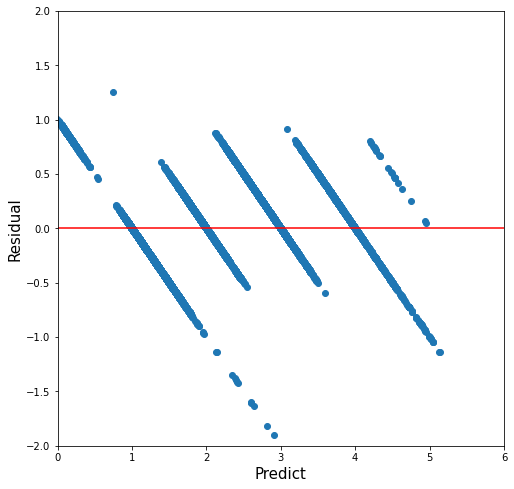

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.scatter(y_pred,fit.resid) ## 잔차도 출력
ax.axhline(y=0, color='red')
plt.xlim(0, 6)
plt.ylim(-2, 2)
plt.xlabel('Predict', fontsize=15)
plt.ylabel('Residual', fontsize=15)
plt.show()

In [ ]:
data['Abs_Residual'] = abs(fit.resid) ## 잔차 절대값
std_fit = ols('Abs_Residual~Pressure + Second + Hour + Wind + Size + Speed + Chance',data=data).fit() ## 잔차 절대값과 연령을 이용하여 회귀 모형 적합

In [ ]:
std_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Abs_Residual   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     598.3
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:27:58   Log-Likelihood:                 1533.0
No. Observations:                9439   AIC:                            -3050.
Df Residuals:                    9431   BIC:                            -2993.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0987      0.168     54.160      0.000       8.769       9.428
Pressure      -0.0086      0.000    -52.709      0.000      -0.009      -0.008
Second         0.5342      0.027     19.729      0.000       0.481       0.587
Hour          -0.1527      0.008    -20.316      0.000      -0.167      -0.138
Wind          -0.0003   3.55e-05     -7.409      0.000      -0.000      -0.000
Size           0.0387      0.007      5.715      0.000       0.025       0.052
Speed          0.0012      0.000      7.084      0.000       0.001       0.001
Chance        -0.0059      0.004     -1.433      0.152      -0.014       0.002
==============================================================================
Omnibus:                      847.490   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1166.980
Skew:                           0.737   Prob(JB):                    3.92e-254
Kurtosis:                       3.890   Cond. No.                     8.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print(X.shape, W.shape, y.shape)

(9439, 8) (9439, 9439) (9439,)


In [ ]:
p = 2 ## intercept, slope
y = y_pred ## Response
weight = 1/np.square(std_fit.fittedvalues)
W = np.diag(weight) ## Weight Diagonal Matrix
 
## Model Matrix
x['Intercept'] = [1]*len(data)
X = np.array(x)
 
XtWX = np.matmul(np.matmul(X.transpose(),W),X)
XtWX_inv = np.linalg.inv(XtWX)
XtWy = np.matmul(np.matmul(X.transpose(),W),y)
weighted_coef = np.matmul(XtWX_inv,XtWy) ## weighted least square estimator of slope

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


LinAlgError: ignored

In [ ]:
print(weighted_coef)

[2.]


In [ ]:
fit = ols('Itnensity ~ Pressure + Second + Hour + Wind + Size + Speed + Chance', data = x_train).fit()

PatsyError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

x = data[['Pressure', 'Second', 'Hour', 'Wind', 'Size', 'Speed', 'Chance']]
y = data[['Itnensity']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [ ]:
y_pred = fit.predict(x_train)

In [ ]:
print(y_pred.shape, fit.resid.shape)

(6607,) (9439,)


ValueError: ignored

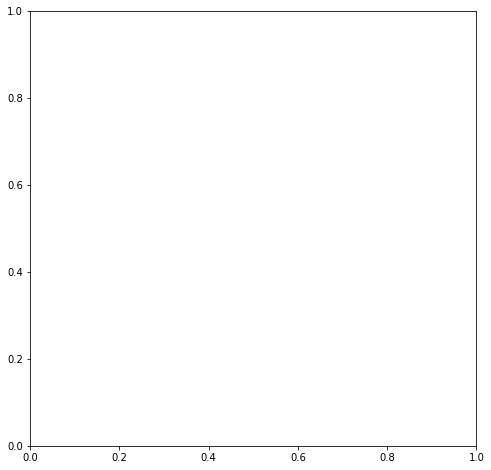

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.scatter(y_pred,fit.resid) ## 잔차도 출력
ax.axhline(y=0, color='red')
plt.xlim(0, 6)
plt.ylim(-2, 2)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Residual', fontsize=15)
plt.show()

In [ ]:
data['Abs_Residual'] = abs(fit.resid) ## 잔차 절대값
std_fit = ols('Abs_Residual~Pressure + Second + Hour + Wind + Size + Speed + Chance',data=data).fit() ## 잔차 절대값과 연령을 이용하여 회귀 모형 적합

In [ ]:
std_fit.summary()

In [ ]:
p = 2 ## intercept, slope
y = y_pred ## Response
weight = 1/np.square(std_fit.fittedvalues)
W = np.diag(weight) ## Weight Diagonal Matrix
 
## Model Matrix
x['Intercept'] = [1]*len(data)
X = np.array(x)
 
XtWX = np.matmul(np.matmul(X.transpose(),W),X)
XtWX_inv = np.linalg.inv(XtWX)
XtWy = np.matmul(np.matmul(X.transpose(),W),y)
weighted_coef = np.matmul(XtWX_inv,XtWy) ## weighted least square estimator of slope

In [ ]:
sqrt_weight = np.sqrt(weight)
sqrt_W = np.diag(sqrt_weight)
 
y_w = np.matmul(sqrt_W,y)
X_w = np.matmul(sqrt_W,X)
weighted_residual = y_w - np.matmul(X_w,weighted_coef)
weighted_AGE = X_w[:,1]
 
## 잔차도 출력
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.scatter(weighted_AGE,weighted_residual) 
ax.axhline(y=0, color='red')

plt.xlabel('weighted_AGE', fontsize=15)
plt.ylabel('weighted_residual', fontsize=15)
plt.show()

In [ ]:
print(X.shape, W.shape, y.shape)

(6607, 8) (6607, 6607) (6607, 1)


In [ ]:
df = pd.read_csv('./blood_pressure.csv') ## 데이터 불러오기
fit = ols('DBP ~ Age',data=df).fit() ## 단순선형회귀모형 적합
 
df['Abs_Residual'] = abs(fit.resid)
std_fit = ols('Abs_Residual~Age',data=df).fit() ## 잔차의 절대값 ~ 연령
wls_fit = wls('DBP ~ Age',data=df, weights = 1/np.square(res.fittedvalues)).fit()


In [ ]:
import statsmodels.api as sm

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6607, 7) (1888, 7) (6607, 1) (1888, 1)


In [ ]:
full_model = sm.OLS(y_train, x_train)

In [ ]:
fitted_full_model = full_model.fit()

In [ ]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Itnensity   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          3.067e+04
Date:                Mon, 10 Oct 2022   Prob (F-statistic):                        0.00
Time:                        04:09:34   Log-Likelihood:                         -3269.5
No. Observations:                6607   AIC:                                      6553.
Df Residuals:                    6600   BIC:                                      6601.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pressure      -0.0006   1.66e-05    -37.779      0.000      -0.001      -0.001
Second         0.5284      0.062      8.493      0.000       0.406       0.650
Hour          -0.1235      0.017     -7.143      0.000      -0.157      -0.090
Wind          -0.0022   7.99e-05    -28.036      0.000      -0.002      -0.002
Size           0.5341      0.015     35.482      0.000       0.505       0.564
Speed          0.0022      0.000      5.908      0.000       0.001       0.003
Chance         0.0035      0.008      0.444      0.657      -0.012       0.019
==============================================================================
Omnibus:                      355.390   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.348
Skew:                           0.522   Prob(JB):                    4.00e-101
Kurtosis:                       3.768   Cond. No.                     1.35e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
res = fitted_full_model.resid

In [ ]:
print(res)

6322   -0.096644
5467   -0.239952
3335    0.074027
8181    0.248877
4761    0.291584
          ...   
8769   -0.335538
9220    0.773739
6729    0.928537
1372   -0.174433
6901   -0.534653
Length: 6607, dtype: float64


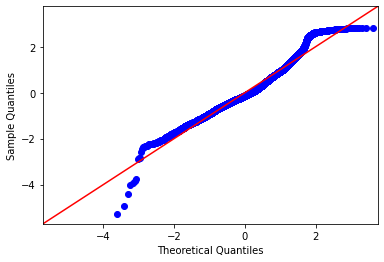

In [ ]:
fig = sm.qqplot(res, fit=True, line = '45')

In [ ]:
y_pred = fitted_full_model.predict(x_train)

ValueError: ignored

In [ ]:
print(y_pred.shape)

(6607,)


In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Residual')

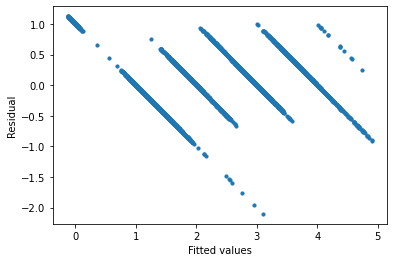

In [ ]:
plt.scatter(y_pred, res, s=10 )
plt.xlabel('Fitted values')
plt.ylabel('Residual')


In [ ]:
fitted = res.predict(data)
residual = data['Itnensity'] - fitted

In [ ]:
import scipy.stats

In [ ]:
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

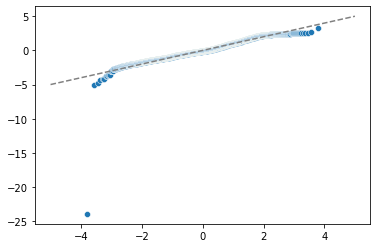

In [ ]:
sns.scatterplot(x, y)
plt.plot([-5, 5], [-5, 5], '--', color = 'gray')

In [ ]:
scipy.stats.shapiro(residual)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9428643584251404, pvalue=0.0)

In [ ]:
data.resid

AttributeError: ignored

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


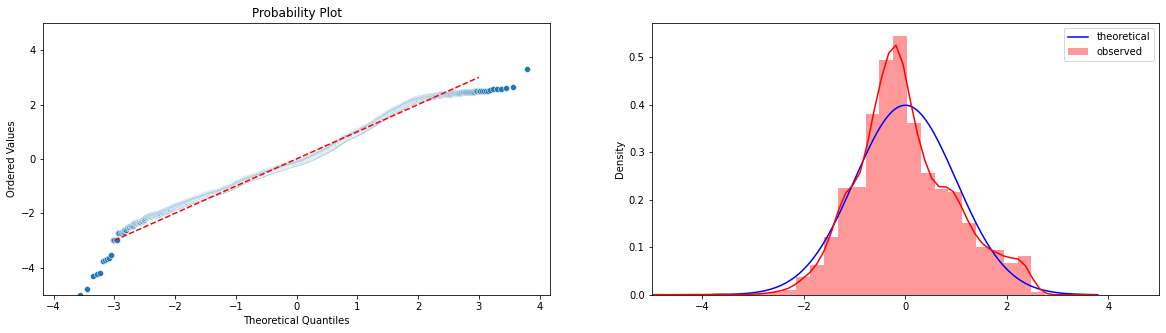

In [ ]:
fig = plt.figure(figsize = (20, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot([-3, 3], [-3, 3], '--', color = 'red')
sns.scatterplot(x, y, ax = ax1)

ax1.set_ylim(-5, 5)
ax1.set_title('Probability Plot')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Ordered Values')

mu = y.mean()
variance = y.var()
sigma = variance ** 0.5


ax2.plot(x, stats.norm.pdf(x, mu, sigma), color = 'blue', label = 'theoretical')
sns.distplot(ax = ax2, a = y, bins = 100, color = 'red', label = 'observed')
ax2.legend()
ax2.set_xlim(-5, 5)

plt.show()



In [ ]:
test_stat, p_val = stats.shapiro(residual)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
print(f'Test-statistics : {test_stat}, p-value : {p_val}')

Test-statistics : 0.9428746700286865, p-value : 0.0


오차항의 등분산성

In [ ]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


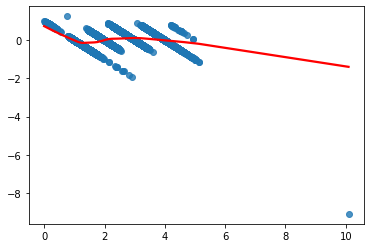

In [ ]:
sns.regplot(fitted, residual, lowess = True, line_kws = {'color' : 'red'})


In [ ]:
data.to_csv('/content/drive/MyDrive/태풍/data2.csv')

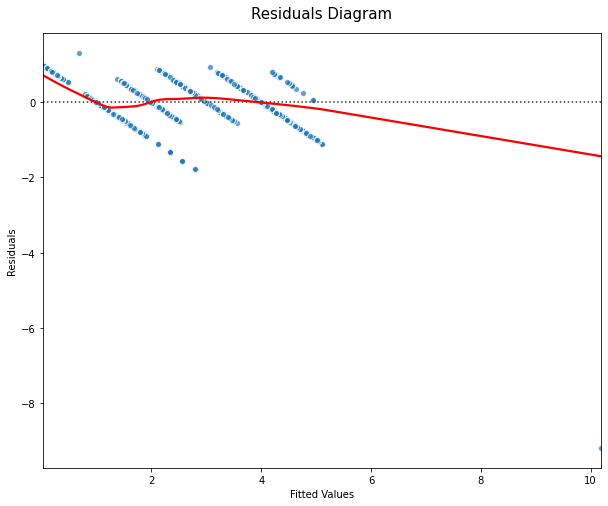

In [ ]:
fig = plt.figure(figsize= (10,8))

p = sns.residplot(x = yhat, y = "Itnensity", 
                  data = data, 
                  scatter_kws = {'edgecolor':"white", "alpha":0.7},
                  lowess = True,
                  line_kws = {"color":"red"})

p.set_title("Residuals Diagram", fontsize=15, y=1.02)
p.set(xlabel= "Fitted Values", ylabel = "Residuals")

plt.show()

In [ ]:
yhat = res.fittedvalues

오차항의 독립성

In [ ]:
data.columns

Index(['Unnamed: 0', 'Date', 'Latitude(N)', 'Longitude(E)', 'Pressure',
       'Second', 'Hour', 'Wind', 'Itnensity', 'Size', 'Direction', 'Speed',
       'Chance', 'name'],
      dtype='object')

회귀계수 + 결정계수( $R^{2}$ ) 확인

In [ ]:
new_data.columns

Index(['중심기압', '초속', '시속', '강풍반경', '강도', '크기', '이동속도', '확률반경', 'name', 'time',
       'date', '시간'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

x = data[['Pressure', 'Second','Hour', 'Wind', 'Size', 'Speed', 'Chance']]
y = data[['Itnensity']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [ ]:
y_predict = mlr.predict(x_test)

In [ ]:
print(y_predict)

[[1.47128628]
 [2.32764629]
 [1.88369249]
 ...
 [1.07715171]
 [3.22961144]
 [3.22381515]]


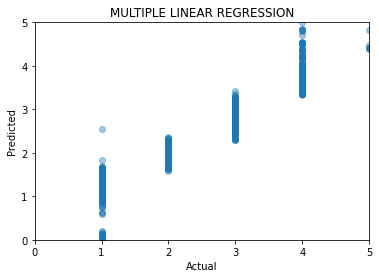

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.axis([0, 5, 0, 5])
plt.show()

In [ ]:
print(mlr.coef_)

[[-0.03042985  0.00212986 -0.00149157  0.        ]]


In [ ]:
((y_test - y_predict) ** 2).sum()

Itnensity    353.578982
dtype: float64

In [ ]:
((y_test - y.mean()) ** 2).sum()

Itnensity    2240.597599
dtype: float64

In [ ]:
print(mlr.score(x_train, y_train))

0.7421037505184509


다중 공분산성 확인 (VIF 확인)


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
data.columns

Index(['Unnamed: 0', 'Date', 'Latitude(N)', 'Longitude(E)', 'Pressure',
       'Second', 'Hour', 'Wind', 'Itnensity', 'Size', 'Direction', 'Speed',
       'Chance', 'name', 'Abs_Residual'],
      dtype='object')

In [ ]:
dfx = data[['Pressure', 'Wind', 'Speed', 'Chance']]
dfy = data[['Itnensity']]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
dfx.values

array([[1000.,  100.,   15.,    0.],
       [1000.,  120.,    4.,    0.],
       [ 998.,  150.,   14.,    0.],
       ...,
       [ 994.,  250.,   27.,    0.],
       [ 994.,  250.,   30.,    0.],
       [ 994.,    0.,   34.,    0.]])

In [ ]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(dfx.values, i) for i in range(dfx.shape[1])]
vif['features'] = dfx.columns
vif = vif.sort_values('VIF Factor').reset_index(drop = True)
vif

,VIF Factor,features
0,1.000109,Chance
1,3.736027,Speed
2,5.436942,Wind
3,8.756582,Pressure


분석표

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols(formula = 'Itnensity ~ Pressure + Wind + Speed + Chance', data = data)

In [ ]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Itnensity   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     7592.
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        06:45:02   Log-Likelihood:                -7463.8
No. Observations:                9439   AIC:                         1.494e+04
Df Residuals:                    9434   BIC:                         1.497e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9676      0.270    122.042      0.000      32.438      33.497
Pressure      -0.0322      0.000   -120.186      0.000      -0.033      -0.032
Wind           0.0019   5.33e-05     35.735      0.000       0.002       0.002
Speed         -0.0013      0.000     -3.012      0.003      -0.002      -0.000
Chance         0.0014      0.011      0.135      0.892      -0.019       0.022
==============================================================================
Omnibus:                    22107.687   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        725227786.082
Skew:                         -22.611   Prob(JB):                         0.00
Kurtosis:                    1360.184   Cond. No.                     4.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

변수선택

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/태풍/print_data2.csv')

In [ ]:
data.columns

Index(['Unnamed: 0', 'Date', 'Latitude(N)', 'Longitude(E)', 'Pressure',
       'Second', 'Hour', 'Wind', 'Itnensity', 'Size', 'Direction', 'Speed',
       'Chance', 'name'],
      dtype='object')

In [ ]:
data.rename(columns = {'Central Pressure' : 'Pressure', 'M/s' : 'Second', 'Km/s' : 'Hour', 'Wind radius' : 'Wind', '70% Chance radius' : 'Chance'}, inplace = True  )

In [ ]:
data = sm.add_constant(data, has_constant = "add")
data

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Unnamed: 0,Date,Latitude(N),Longitude(E),Pressure,Second,Hour,Wind,Itnensity,Size,Direction,Speed,Chance,name
0,1.0,0,2011-09-07,21.5,135.4,1000.0,18.0,65.0,100.0,1,1,NNE,15.0,0.0,typhoon_1
1,1.0,1,2011-09-07,21.5,135.3,1000.0,18.0,65.0,120.0,1,1,W,4.0,0.0,typhoon_1
2,1.0,2,2011-09-07,22.2,135.5,998.0,17.0,61.0,150.0,1,1,NNE,14.0,0.0,typhoon_1
3,1.0,3,2011-09-08,23.7,135.2,998.0,18.0,65.0,150.0,1,1,NNW,29.0,0.0,typhoon_1
4,1.0,4,2011-09-08,24.7,134.2,1000.0,18.0,65.0,150.0,1,1,NW,26.0,0.0,typhoon_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,1.0,9434,2011-09-05,36.5,148.7,994.0,21.0,76.0,250.0,1,1,NW,33.0,0.0,typhoon_529
9435,1.0,9435,2011-09-06,36.8,148.3,994.0,21.0,76.0,250.0,1,1,NW,9.0,0.0,typhoon_529
9436,1.0,9436,2011-09-06,37.9,149.4,994.0,21.0,76.0,250.0,1,1,NE,27.0,0.0,typhoon_529
9437,1.0,9437,2011-09-06,39.4,150.1,994.0,21.0,76.0,250.0,1,1,NNE,30.0,0.0,typhoon_529


In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
x = data[['const', 'Pressure', 'Second', 'Hour', 'Wind', 'Size', 'Speed', 'Chance']]
y = data[['Itnensity']]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(6607, 8) (2832, 8) (6607, 1) (2832, 1)


In [ ]:
res = ols('Itnensity ~ Pressure + Second + Hour + Wind + Size + Speed + Chance', data = data).fit()

In [ ]:
def processSubset(X,y,feature_set):
    model = ols(formula = 'Itnensity ~ Pressure + Second + Hour + Wind + Size + Speed + Chance', data = data) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}
    
print(processSubset(X = train_x, y = train_y, feature_set = x))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f4a93d9fa50>, 'AIC': 8524.141674684863}


In [ ]:
processSubset(X=train_x, y=train_y, feature_set = x) 

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f4a93d4e250>,
 'AIC': 8524.141674684863}

In [ ]:
import time
import itertools 

# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수

def getBest(X,y,k):
    tic = time.time()      # 시작 시간
    results = []           # 결과 저장 공간
    for combo in itertools.combinations(X.columns.difference(['const']), k) :
		# 각 변수 조합을 고려한 경우의수
        
        combo = (list(combo)+['const'])
        # 상수항을 추가하여 combo를 결성
        
        results.append(processSubset(X,y,feature_set = combo)) # 모델링된것을 저장
        
        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
        # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함
	
    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time()       # 종료 시간
    print("Processed", models.shape[0], "models on", k, "predictors in",(toc - tic),"seconds.")
    
    return best_model
    
print(getBest(X=train_x, y = train_y, k=2))
    
    

Processed 21 models on 2 predictors in 1.0022773742675781 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                            8524.141675
Name: 0, dtype: object


In [ ]:
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,4):
	models.loc[i] = getBest(X=train_x, y=train_y,k=i)
toc = time.time()
print("Total elapsed time:",(toc-tic),"seconds.")

Processed 7 models on 1 predictors in 0.42612385749816895 seconds.
Processed 21 models on 2 predictors in 1.1363046169281006 seconds.
Processed 35 models on 3 predictors in 1.2769877910614014 seconds.
Total elapsed time: 2.880654811859131 seconds.


In [ ]:
models

,AIC,model
1,8524.141675,<statsmodels.regression.linear_model.Regressio...
2,8524.141675,<statsmodels.regression.linear_model.Regressio...
3,8524.141675,<statsmodels.regression.linear_model.Regressio...


In [ ]:
models.loc[3,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Itnensity   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     9874.
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:06:21   Log-Likelihood:                -4254.1
No. Observations:                9439   AIC:                             8524.
Df Residuals:                    9431   BIC:                             8581.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6645      0.310     31.161      0.000       9.057      10.272
Pressure      -0.0100      0.000    -33.199      0.000      -0.011      -0.009
Second         0.4726      0.050      9.455      0.000       0.375       0.571
Hour          -0.1126      0.014     -8.115      0.000      -0.140      -0.085
Wind          -0.0017   6.55e-05    -26.272      0.000      -0.002      -0.002
Size           0.4120      0.013     32.950      0.000       0.387       0.436
Speed          0.0013      0.000      4.419      0.000       0.001       0.002
Chance         0.0030      0.008      0.401      0.688      -0.012       0.018
==============================================================================
Omnibus:                     4251.450   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           474544.766
Skew:                          -1.185   Prob(JB):                         0.00
Kurtosis:                      37.655   Cond. No.                     8.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print("full model Rsquared:","{:.5f}".format(res.rsquared))
print("full model AIC:","{:.5f}".format(res.aic))
print("full model MSE:","{:.5f}".format(res.mse_total))

print("selected model Rsquared:","{:.5f}".format(models.loc[3,"model"].rsquared))
print("selected model AIC:","{:.5f}".format(models.loc[3,"model"].aic))
print("selected model MSE:","{:.5f}".format(models.loc[3,"model"].mse_total))

full model Rsquared: 0.87994
full model AIC: 8524.14167
full model MSE: 1.20124
selected model Rsquared: 0.87994
selected model AIC: 8524.14167
selected model MSE: 1.20124


In [ ]:
### 전진석택법(step=1)

def forward(X,y,predictors):
	
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
      results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model
    
### 전진선택법 모델

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
      Forward_result = forward(X=X,y=y,predictors=predictors)
      if i > 1:
          if Forward_result["AIC"] > Fmodel_before:
              break
      Fmodels.loc[i] = Forward_result
      predictors = Fmodels.loc[i]["model"].model.exog_names
      Fmodel_before = Fmodels.loc[i]["AIC"]
      predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [ ]:
Forward_best_model = forward_model(X=train_x, y=train_y)

Processed  7 models on 1 predictors in 0.20140624046325684
Selected predictors: ['Intercept', 'Pressure', 'Second', 'Hour', 'Wind', 'Size', 'Speed', 'Chance'] AIC:  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f4a93bb5c50>


KeyError: ignored

In [ ]:
Forward_best_model.aic

## 4. 인공신경망

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/태풍/print_data2.csv')
data

,Unnamed: 0,Date,Latitude(N),Longitude(E),Central Pressure,M/s,Km/s,Wind radius,Itnensity,Size,Direction,Speed,70% Chance radius,name
0,0,2011-09-07,21.5,135.4,1000.0,18.0,65.0,100.0,1,1,NNE,15.0,0.0,typhoon_1
1,1,2011-09-07,21.5,135.3,1000.0,18.0,65.0,120.0,1,1,W,4.0,0.0,typhoon_1
2,2,2011-09-07,22.2,135.5,998.0,17.0,61.0,150.0,1,1,NNE,14.0,0.0,typhoon_1
3,3,2011-09-08,23.7,135.2,998.0,18.0,65.0,150.0,1,1,NNW,29.0,0.0,typhoon_1
4,4,2011-09-08,24.7,134.2,1000.0,18.0,65.0,150.0,1,1,NW,26.0,0.0,typhoon_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,9434,2011-09-05,36.5,148.7,994.0,21.0,76.0,250.0,1,1,NW,33.0,0.0,typhoon_529
9435,9435,2011-09-06,36.8,148.3,994.0,21.0,76.0,250.0,1,1,NW,9.0,0.0,typhoon_529
9436,9436,2011-09-06,37.9,149.4,994.0,21.0,76.0,250.0,1,1,NE,27.0,0.0,typhoon_529
9437,9437,2011-09-06,39.4,150.1,994.0,21.0,76.0,250.0,1,1,NNE,30.0,0.0,typhoon_529


In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/태풍/data2.csv')

In [ ]:
data['time'] = list(data2['time'])

In [ ]:
data

,Unnamed: 0,Date,Latitude(N),Longitude(E),Central Pressure,M/s,Km/s,Wind radius,Itnensity,Size,Direction,Speed,70% Chance radius,name,time
0,0,2011-09-07,21.5,135.4,1000.0,18.0,65.0,100.0,1,1,NNE,15.0,0.0,typhoon_1,0.0
1,1,2011-09-07,21.5,135.3,1000.0,18.0,65.0,120.0,1,1,W,4.0,0.0,typhoon_1,3.0
2,2,2011-09-07,22.2,135.5,998.0,17.0,61.0,150.0,1,1,NNE,14.0,0.0,typhoon_1,9.0
3,3,2011-09-08,23.7,135.2,998.0,18.0,65.0,150.0,1,1,NNW,29.0,0.0,typhoon_1,15.0
4,4,2011-09-08,24.7,134.2,1000.0,18.0,65.0,150.0,1,1,NW,26.0,0.0,typhoon_1,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,9434,2011-09-05,36.5,148.7,994.0,21.0,76.0,250.0,1,1,NW,33.0,0.0,typhoon_529,30.0
9435,9435,2011-09-06,36.8,148.3,994.0,21.0,76.0,250.0,1,1,NW,9.0,0.0,typhoon_529,36.0
9436,9436,2011-09-06,37.9,149.4,994.0,21.0,76.0,250.0,1,1,NE,27.0,0.0,typhoon_529,42.0
9437,9437,2011-09-06,39.4,150.1,994.0,21.0,76.0,250.0,1,1,NNE,30.0,0.0,typhoon_529,48.0


In [ ]:
# Central Pressure 전처리

for i in range(len(data)):
  if 0 <= data['Central Pressure'][i] <=  930:
    data['Central Pressure'][i] = 1
  if 930 < data['Central Pressure'][i] <= 970:
    data['Central Pressure'][i] = 2
  if 970 < data['Central Pressure'][i] <= 1010:
    data['Central Pressure'][i] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data['Central Pressure'].value_counts()

3.0    6142
2.0    2754
1.0     543
Name: Central Pressure, dtype: int64

In [ ]:
# M/s 전처리

for i in range(len(data)):
  if -1 <= data['M/s'][i] <=  20:
    data['M/s'][i] = 1
  if 20 < data['M/s'][i] <= 40:
    data['M/s'][i] = 2
  if 40 < data['M/s'][i] <= 61:
    data['M/s'][i] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data['M/s'].value_counts()

2.0    5209
1.0    2517
3.0    1713
Name: M/s, dtype: int64

In [ ]:
# Km/s 전처리

for i in range(len(data)):
  if -4 <= data['Km/s'][i] <=  71:
    data['Km/s'][i] = 1
  if 71 < data['Km/s'][i] <= 146:
    data['Km/s'][i] = 2
  if 146 < data['Km/s'][i] <= 220:
    data['Km/s'][i] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data['Km/s'].value_counts()

2.0    5607
1.0    2119
3.0    1713
Name: Km/s, dtype: int64

In [ ]:
a = data['Speed']

In [ ]:
a.value_counts()

15.0     480
20.0     425
22.0     413
19.0     399
17.0     395
        ... 
110.0      1
102.0      1
93.0       1
88.0       1
103.0      1
Name: Speed, Length: 98, dtype: int64

In [ ]:
# Speed 전처리

for i in range(len(a)):
  if 0 <= a[i] <=  24:
    a[i] = 1
  if 24 < a[i] <= 48:
    a[i] = 2
  if 48 < a[i] <= 216:
    a[i] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data['Speed'].value_counts()

1.0    6447
2.0    2608
3.0     384
Name: Speed, dtype: int64

In [ ]:
for i in range(len(data)):
  if 0 <= data['Wind radius'][i] <=  164:
    data['Wind radius'][i] = 1
  if 164 < data['Wind radius'][i] <= 328:
    data['Wind radius'][i] = 2
  if 328 < data['Wind radius'][i] <= 1480:
    data['Wind radius'][i] = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
data['Wind radius'].value_counts()

2.0    4999
3.0    2975
1.0    1465
Name: Wind radius, dtype: int64

In [ ]:
data.isnull().sum() / data.shape[0]

Unnamed: 0           0.0
Date                 0.0
Latitude(N)          0.0
Longitude(E)         0.0
Central Pressure     0.0
M/s                  0.0
Km/s                 0.0
Wind radius          0.0
Itnensity            0.0
Size                 0.0
Direction            0.0
Speed                0.0
70% Chance radius    0.0
name                 0.0
time                 0.0
dtype: float64

In [ ]:
data['Itnensity'].replace({4 : 3, 5 : 3}, inplace = True)

In [ ]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
data.columns

Index(['Unnamed: 0', 'Date', 'Latitude(N)', 'Longitude(E)', 'Central Pressure',
       'M/s', 'Km/s', 'Wind radius', 'Itnensity', 'Size', 'Direction', 'Speed',
       '70% Chance radius', 'name', 'time'],
      dtype='object')

In [ ]:
y = data['Itnensity']
x = data[['Central Pressure', 'M/s', 'Km/s', 'Wind radius', 'Size', 'Speed']]

In [ ]:
x

,Central Pressure,M/s,Km/s,Wind radius,Size,Speed
0,3.0,1.0,1.0,1.0,1,1.0
1,3.0,1.0,1.0,1.0,1,1.0
2,3.0,1.0,1.0,1.0,1,1.0
3,3.0,1.0,1.0,1.0,1,2.0
4,3.0,1.0,1.0,1.0,1,2.0
...,...,...,...,...,...,...
9434,3.0,2.0,2.0,2.0,1,2.0
9435,3.0,2.0,2.0,2.0,1,1.0
9436,3.0,2.0,2.0,2.0,1,2.0
9437,3.0,2.0,2.0,2.0,1,2.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify = y, random_state = 2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7551, 6) (7551,) (1888, 6) (1888,)


In [ ]:
x_train = torch.Tensor(x_train.values)
y_train = torch.Tensor(y_train.values)

x_test = torch.Tensor(x_test.values)
y_test = torch.Tensor(y_test.values)

In [ ]:
train = torch.utils.data.TensorDataset(x_train, y_train)
test = torch.utils.data.TensorDataset(x_test, y_test)

In [ ]:
train_load = torch.utils.data.DataLoader(train, batch_size = 32, shuffle = True)
test_load = torch.utils.data.DataLoader(test, batch_size = 32, shuffle = True)

In [ ]:
7551 / 32

235.96875

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim),
            nn.Tanh()
        )
    
    def forward(self, x): 
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

device_gpu = torch.device('cuda')

Using cuda device


In [ ]:
input_dim = 6
output_dim = 1

model = NeuralNetwork(input_dim, output_dim).to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=6, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
    (5): Tanh()
  )
)


In [ ]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2, momentum = 0.9)

In [ ]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score

In [ ]:
epoch = 10
optimizer_list = []
for j in range(1, epoch + 1):
    optimizer_list.append(list(model.parameters()))
    train_loss = []
    test_loss = []
    accuracy = []
    model.train()
    for idx, (X_batch, Y_batch) in enumerate(tqdm(train_load)):
        list_ = []
        X_batch = X_batch.to(device_gpu)
        Y_batch = Y_batch.to(device_gpu)
        optimizer.zero_grad()
        y_pred = model(X_batch).squeeze()
        for i in range(len(y_pred)):
            if 0 < y_pred[i] <= 1/3:
              list_.append(1)
            if 1/3 < y_pred[i] <= 2/3:
              list_.append(2)
            if 2/3 < y_pred[i] <= 1:
              list_.append(3)
        y_pred = torch.Tensor(list_).cuda()
        loss = loss_fn(y_pred, Y_batch)
        train_loss.append(loss.item())

        loss.requires_grad_(True)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    model.eval()
    for idx, (X_batch, Y_batch) in enumerate(tqdm(test_load)):
        list_ = []
        X_batch = X_batch.to(device_gpu)
        Y_batch = Y_batch.to(device_gpu)
        y_pred = model(X_batch)
        for i in range(len(y_pred)):
            if 0 < y_pred[i] <= 1/3:
              list_.append(1)
            if 1/3 < y_pred[i] <= 2/3:
              list_.append(2)
            if 2/3 < y_pred[i] <= 1:
              list_.append(3)
        y_pred = torch.Tensor(list_).cuda()
        loss = loss_fn(y_pred, Y_batch)
        test_loss.append(loss.item())
        
        loss.requires_grad_(True)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        acc = accuracy_score(Y_batch.detach().cpu().numpy(), y_pred.cpu().numpy())
        accuracy.append(acc)
        
    print('epoch {}, loss {}, Accuracy {}'.format(j, np.mean(test_loss), np.mean(accuracy)))

  0%|          | 0/236 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([0])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
  0%|          | 0/236 [00:00<?, ?it/s]


RuntimeError: ignored

In [ ]:
print(optimizer_list[2] == optimizer_list[1])

True


In [ ]:
가중치 최적화 확인하기


SyntaxError: ignored

In [ ]:
optimizer_list = []

In [ ]:
optimizer_list.append(list(model.parameters()))
for idx, (X_batch, Y_batch) in enumerate(tqdm(train_load)):
        list_ = []
        X_batch = X_batch.to(device_gpu)
        Y_batch = Y_batch.to(device_gpu)
        y_pred = model(X_batch).squeeze()
        for i in range(len(y_pred)):
            if 0 < y_pred[i] <= 1/3:
              list_.append(1)
            if 1/3 < y_pred[i] <= 2/3:
              list_.append(2)
            if 2/3 < y_pred[i] <= 1:
              list_.append(3)
        y_pred = torch.Tensor(list_).cuda()
        loss = loss_fn(y_pred, Y_batch)
        train_loss.append(loss.item())

        loss.requires_grad_(True)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
optimizer_list.append(list(model.parameters()))

100%|██████████| 236/236 [00:01<00:00, 209.27it/s]


In [ ]:
optimizer_list[1] == optimizer_list[0]


True

In [ ]:
len(train_loss)

236

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.1224, -0.0097, -0.2144,  0.3667,  0.1397,  0.0085,  0.0952],
         [ 0.0036,  0.1426,  0.1482, -0.1409,  0.2772, -0.0387,  0.0078],
         [ 0.0520,  0.0424, -0.0560,  0.3052, -0.0020, -0.3554,  0.3635],
         [-0.2061, -0.0646,  0.2122, -0.1394, -0.3680, -0.3635, -0.2725],
         [-0.2180,  0.0650, -0.1829, -0.2951, -0.2290,  0.1920,  0.3035],
         [-0.2326, -0.2925, -0.1463, -0.2111, -0.1051, -0.0748,  0.3008],
         [-0.0211,  0.2389, -0.0975,  0.1964, -0.0593, -0.3410,  0.0829],
         [ 0.2860, -0.3428, -0.3220,  0.2976, -0.1818,  0.2497,  0.2791],
         [-0.3076,  0.2995, -0.0251, -0.2516,  0.0737, -0.2646,  0.3066],
         [ 0.2564,  0.2254, -0.1463, -0.3750, -0.0297,  0.1582, -0.1115],
         [-0.1073,  0.3518, -0.0919, -0.0392,  0.2247,  0.3511, -0.0560],
         [ 0.0107, -0.0933,  0.3199, -0.1155,  0.2360,  0.0217, -0.1125],
         [-0.2990, -0.0068, -0.0192,  0.3470, -0.2289,  0.1238,  0.2828],
         [ 0.05

In [ ]:
list_ = []
for i in range(len(y_pred)):
  if y_pred.squeeze()[0] < 0.2:
    list_.append(1)
  elif y_pred.squeeze()[0] < 0.4:
    list_.append(2)
  elif y_pred.squeeze()[0] < 0.6:
    list_.append(3)
  elif y_pred.squeeze()[0] < 0.8:
    list_.append(4)
  elif y_pred.squeeze()[0] < 1:
    list_.append(5)

In [ ]:
list_ = []

In [ ]:
y_pred = [9.9959e-01, 8.3330e-01, 9.9980e-01, 9.8190e-01, 6.1205e-01, 2.0791e-03,
        9.9886e-01, 9.9784e-01, 9.9990e-01, 9.9734e-01, 8.5112e-01, 9.8825e-01,
        9.9931e-01, 7.2738e-01, 7.0903e-01, 9.9924e-01, 3.4091e-02, 9.9568e-01,
        4.2252e-06, 9.5310e-01, 8.9390e-01, 9.9967e-01, 9.8457e-01, 9.4636e-01,
        9.9988e-01, 1.0000e+00, 9.8304e-01, 9.9814e-01, 9.9698e-01, 9.9291e-01,
        2.5699e-02, 9.9940e-01]

In [ ]:
y_pred = torch.Tensor(y_pred)
len(y_pred)

32

In [ ]:
for i in range(len(y_pred)):
            if 0 < y_pred[i] <= 1/3:
              list_.append(1)
            if 1/3 < y_pred[i] <= 2/3:
              list_.append(2)
            if 2/3 < y_pred[i] <= 1:
              list_.append(3)

In [ ]:
print(len(list_))

32


In [ ]:
print(y_pred.squeeze())

tensor([], device='cuda:0')


In [ ]:
import torch
import torchvision.models as models

In [ ]:
x_df_test = torch.Tensor(df_test.values)
for idx, X_batch in enumerate(tqdm(x_df_test)):
    X_batch = X_batch.to(device_gpu)
    y_pred = model(X_batch)
    y_pred = np.round(y_pred.detach().cpu().numpy())
    df_submit['Survived'][idx] = y_pred

In [ ]:
import os                        # 내 컴퓨터에 있는 파일을 불러오기 위한 라이브러리
import numpy as np               # 수학계산 함수를 불러오는 라이브러리
import pandas as pd              # 파일을 불러올 때 사용하는 라이브러리
import matplotlib.pyplot as plt  # 시각화 그래프를 위한 라이브러리 
import seaborn as sns            # 시각화 그래프를 위한 라이브러리 
import sklearn  

ValueError: ignored

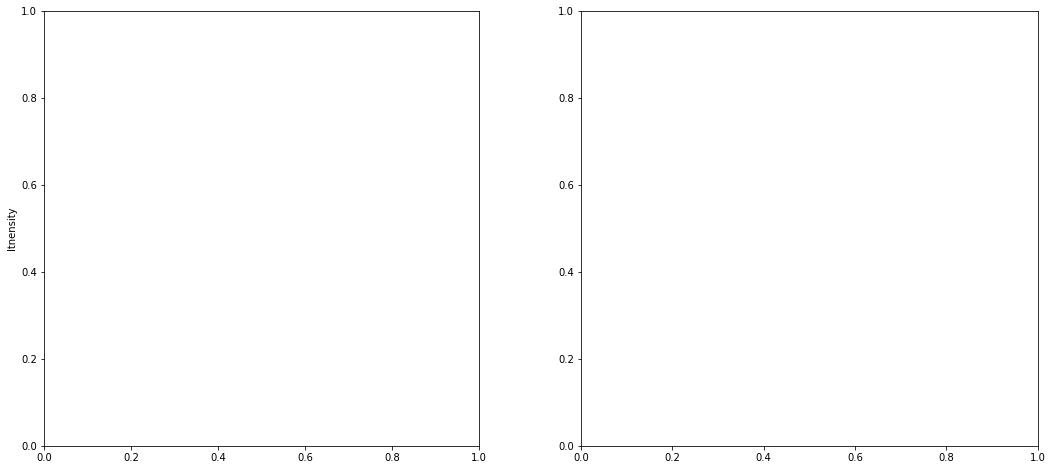

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Itnensity'].value_counts().plot.pie(explode = [0, 0], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Itnensity')
ax[0].set_ylabel('')

sns.countplot('Itnentisy', data = data, ax = ax[1])
ax[1].set_title('Count plot - Itnensity')

plt.show()

데이터 균형

In [ ]:
import os                        # 내 컴퓨터에 있는 파일을 불러오기 위한 라이브러리
import numpy as np               # 수학계산 함수를 불러오는 라이브러리
import pandas as pd              # 파일을 불러올 때 사용하는 라이브러리
import matplotlib.pyplot as plt  # 시각화 그래프를 위한 라이브러리 
import seaborn as sns            # 시각화 그래프를 위한 라이브러리 
import sklearn  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


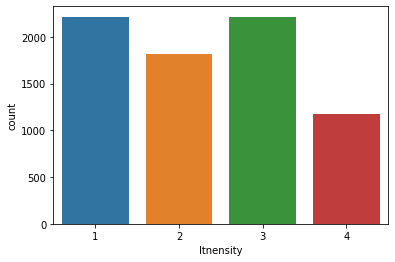

In [ ]:
sns.countplot('Itnensity', data = data)


plt.show()

In [ ]:
data['Itnensity'].replace({4 : 3, 5 : 3}, inplace = True)
  

In [ ]:
len(data)

9413

In [ ]:
import random

i = 0
while i != 2000:
  a = random.randint(0, 9412 - i)
  if data.iloc[a][8] == 1:
    data.drop(a, inplace = True)
    data.reset_index(drop=True, inplace=True)
    i += 1


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data['Itnensity'].value_counts()

1    4215
3    3408
2    1816
Name: Itnensity, dtype: int64

In [ ]:
data

,Central Pressure,M/s,Km/s,Wind radius,Size,Speed,time
0,1000.0,18.0,65.0,100.0,1,15.0,0.0
1,998.0,17.0,61.0,150.0,1,14.0,9.0
2,998.0,18.0,65.0,150.0,1,29.0,15.0
3,1000.0,18.0,65.0,150.0,1,18.0,27.0
4,1004.0,17.0,61.0,100.0,1,25.0,54.0
...,...,...,...,...,...,...,...
7408,996.0,-1.0,-4.0,0.0,1,11.0,258.0
7409,994.0,21.0,76.0,250.0,1,30.0,18.0
7410,994.0,21.0,76.0,250.0,1,33.0,24.0
7411,994.0,21.0,76.0,250.0,1,33.0,30.0


In [ ]:
data.columns

Index(['Unnamed: 0', 'Date', 'Latitude(N)', 'Longitude(E)', 'Central Pressure',
       'M/s', 'Km/s', 'Wind radius', 'Itnensity', 'Size', 'Direction', 'Speed',
       '70% Chance radius', 'name'],
      dtype='object')

In [ ]:
x.columns

Index(['Central Pressure', 'M/s', 'Km/s', 'Wind radius', 'Size', 'Speed',
       'time'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


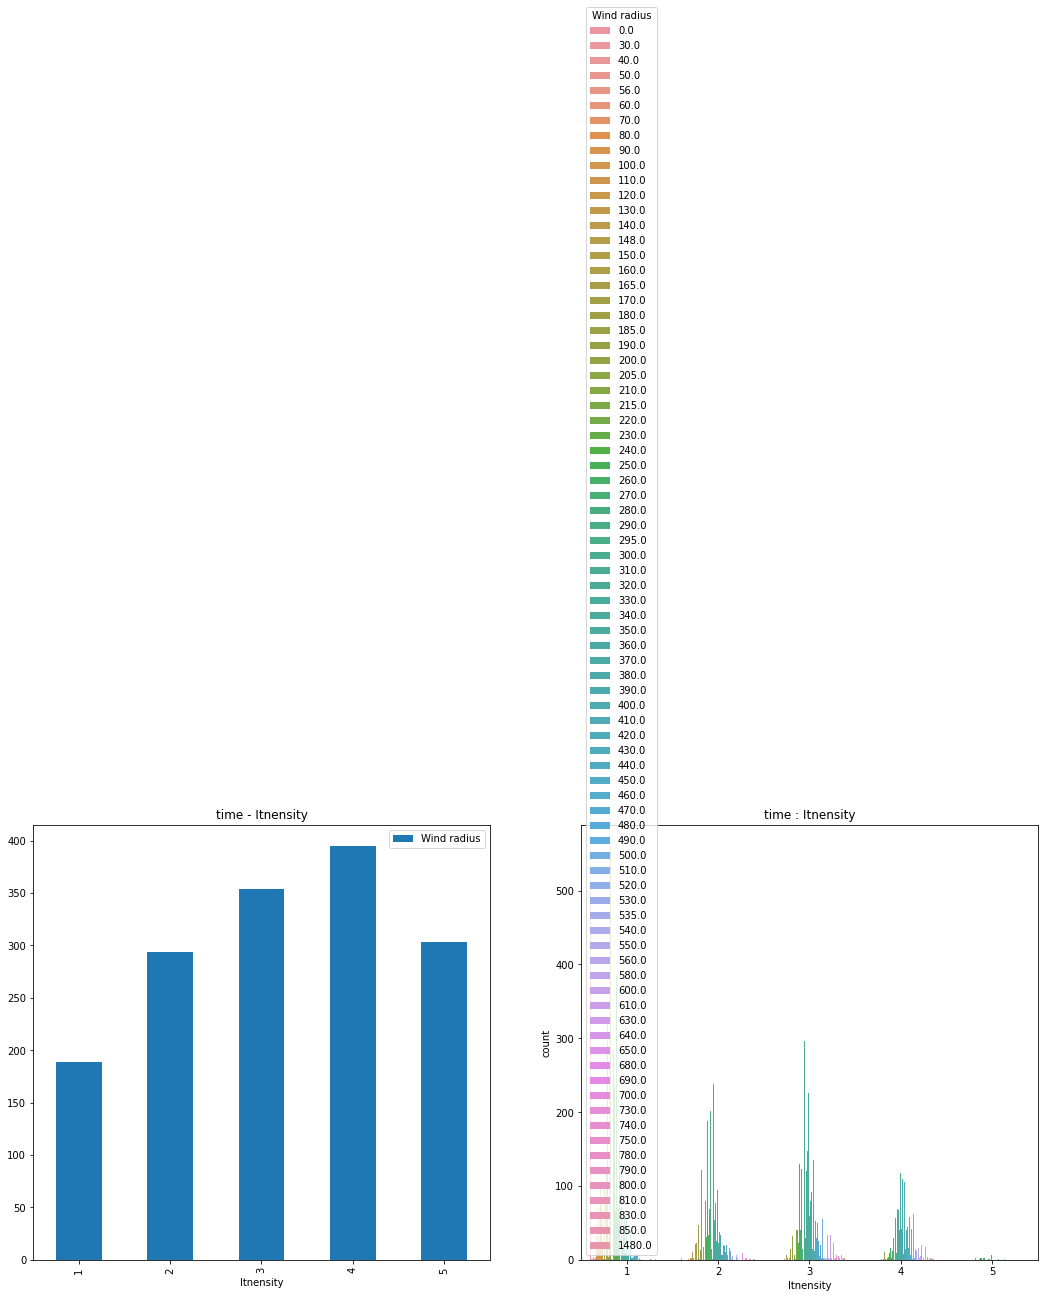

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Itnensity', 'Wind radius']].groupby(['Itnensity']).mean().plot.bar(ax = ax[0])
ax[0].set_title('time - Itnensity')
sns.countplot('Itnensity', hue = 'Wind radius', data = data, ax = ax[1])
ax[1].set_title('time : Itnensity')
plt.show()

In [ ]:
1. 손실함수 변경
2. 매개변수 최적화 논문
3. 

In [ ]:
data.iloc[0]

Central Pressure    1000.0
M/s                   18.0
Km/s                  65.0
Wind radius          100.0
Size                   1.0
Speed                 15.0
time                   0.0
Name: 0, dtype: float64

In [ ]:
l1 = [ 1000.0,  18.0, 65.0,  100.0,  1.0, 15.0, 0.0]
lis = torch.Tensor(l1)
p1 = nn.Linear(7, 64)
r1 = p1(lis)
print(r1)
p2 = nn.Sigmoid()
r2 = p2(r1)
print(r2)
p3 = nn.Linear(64, 32)
r3 = p3(r2)
print(r3)
p4 = nn.Sigmoid()
r4 = p4(r3)
print(r4)
p5 = nn.Linear(32, 1)
r5 = p5(r4)
print(r5)
p6 = nn.Sigmoid()
r6 = p6(r5)
print(r6)

tensor([-169.6102,  310.8416, -293.7538,  258.3661, -223.5946, -180.1747,
        -106.1953,  120.5055,  146.6943,  134.5330,  176.9728, -130.8810,
          73.9046,  -55.3579,  -31.1504,  207.9036,  228.2453,  268.7032,
         346.3500,  -66.5232, -276.0062,  -22.6828, -399.6042,   61.6782,
         -14.2578, -190.7264,  221.5530,  218.2575,  161.6599,   99.0542,
        -346.2941,  187.0350, -226.8940,  -36.6657,  259.3160,  261.2659,
        -303.9144, -367.0790, -343.2803,  -65.6847,   19.8786,  327.9940,
          45.4940, -326.4047,  132.8581,  259.4469,  144.7591, -361.9440,
        -129.2818,   52.5961, -276.6065,  106.0432,  -47.8893, -124.1492,
         106.4422, -358.4581, -206.1731,  -86.6761, -234.2829,  418.4484,
         -90.1997,   41.0748, -335.4106,  -46.3654], grad_fn=<AddBackward0>)
tensor([0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 9.0

In [ ]:
len(y.value_counts())

5

In [ ]:
1 == 1.0

True

In [ ]:
data

,Unnamed: 0,Date,Latitude(N),Longitude(E),Central Pressure,M/s,Km/s,Wind radius,Itnensity,Size,Direction,Speed,70% Chance radius,name,time
0,0,2011-09-07,21.5,135.4,1000.0,18.0,65.0,100.0,1,1,NNE,15.0,0.0,typhoon_1,0.0
1,1,2011-09-07,21.5,135.3,1000.0,18.0,65.0,120.0,1,1,W,4.0,0.0,typhoon_1,3.0
2,2,2011-09-07,22.2,135.5,998.0,17.0,61.0,150.0,1,1,NNE,14.0,0.0,typhoon_1,9.0
3,3,2011-09-08,23.7,135.2,998.0,18.0,65.0,150.0,1,1,NNW,29.0,0.0,typhoon_1,15.0
4,4,2011-09-08,24.7,134.2,1000.0,18.0,65.0,150.0,1,1,NW,26.0,0.0,typhoon_1,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,9434,2011-09-05,36.5,148.7,994.0,21.0,76.0,250.0,1,1,NW,33.0,0.0,typhoon_529,30.0
9435,9435,2011-09-06,36.8,148.3,994.0,21.0,76.0,250.0,1,1,NW,9.0,0.0,typhoon_529,36.0
9436,9436,2011-09-06,37.9,149.4,994.0,21.0,76.0,250.0,1,1,NE,27.0,0.0,typhoon_529,42.0
9437,9437,2011-09-06,39.4,150.1,994.0,21.0,76.0,250.0,1,1,NNE,30.0,0.0,typhoon_529,48.0


In [ ]:
data.to_csv('/content/drive/MyDrive/태풍/R_data.csv')

# 새로운 도전

In [ ]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from sklearn.model_selection import train_test_split

In [ ]:
y = data['Itnensity']
x = data[['Central Pressure', 'M/s', 'Km/s', 'Wind radius', 'Size', 'Speed']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify = y, random_state = 2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

x_train = torch.Tensor(x_train.values)
y_train = torch.Tensor(y_train.values)
x_test = torch.Tensor(x_test.values)
y_test = torch.Tensor(y_test.values)

(7551, 6) (7551,) (1888, 6) (1888,)


In [ ]:
train = torch.utils.data.TensorDataset(x_train, y_train)
test = torch.utils.data.TensorDataset(x_test, y_test)

In [ ]:
train_dataloader = DataLoader(train, batch_size = 32, shuffle = True)
test_dataloader = DataLoader(test, batch_size = 32, shuffle = True)

In [ ]:
V_size = (32, 6)
W_size = (32, 32)
Y_size = (1, 32)

# sign_V = np.random.randint(-1, 2, size=V_size, dtype = np.int64)
# sign_W = np.random.randint(-1, 2, size=W_size, dtype = np.int64)
# sign_Y = np.random.randint(-1, 2, size=Y_size, dtype = np.int64)

# sign_V = torch.from_numpy(sign_V)
# sign_W = torch.from_numpy(sign_W)
# sign_Y = torch.from_numpy(sign_Y)


V  = torch.randn(V_size, dtype=torch.float64)
W  = torch.randn(W_size, dtype=torch.float64)
Y  = torch.randn(Y_size, dtype=torch.float64)

# V = sign_V * V
# W = sign_W * W
# Y = sign_Y * Y

print(V.shape, W.shape, Y.shape)

torch.Size([32, 6]) torch.Size([32, 32]) torch.Size([1, 32])


In [ ]:
class ReLU:
    def __init__(self):
        self.chk = None
 
    def forward(self, x):
        self.chk = (x>0).astype(np.int)
        return x * self.chk
 
    def backward(self, dout):
        return dout * self.chk

class Sigmoid:
    def __init__(self):
        self.y = None
 
    def forward(self, x):
        self.y = 1 / (1 + np.exp(-x))
        return self.y
 
    def backward(self, x):
        self.y = np.exp(-x) / ((1 + np.exp(-x))) ** 2
        return self.y

class Tanh:
    def __init__(self):
        self.y = None
 
    def forward(self, x):
        self.y = np.tanh(x)
        return self.y
 
    def backward(self, x):
        self.y = (1 - np.tanh(x)) * (1 + np.tanh(x))
        return self.y

def MSE(y, t):
    return 0.5 * np.sum((y-t)**2)

relu = ReLU()
sigmoid = Sigmoid()
tanh = Tanh()

def relu_back(x):
  x = x.numpy()
  relu.backward(x)
  x = torch.from_numpy(x)
  return x


In [ ]:
learning_rate = 0.0001
# epoch = 10

# for _ in range(epoch):
for idx, (X_batch, Y_batch) in enumerate(train_dataloader):
  sum = 0

  for i in range(X_batch.shape[0]):
    X = torch.transpose(X_batch[i].unsqueeze(0), 0, 1).type(torch.float64)

    h1 = V.matmul(X)
    z = relu.forward(h1.numpy())
    z = torch.from_numpy(z)

    h2 = W.matmul(z)
    k = relu.forward(h2.numpy())
    k = torch.from_numpy(k) 

    ho = Y.matmul(z)
    y = sigmoid.forward(ho.numpy())
    if -1 <= y < 2 * (1 / 3) - 1:
      y[0][0] = 1
    if 2 * (1 / 3) - 1 <= y < 2 * (2 / 3) - 1:
      y[0][0] = 2
    if 2/3 <= y <= 1:
      y[0][0] = 3  
    print(y)
    y = torch.from_numpy(y)
    sum += (y - y_train[i]) ** 2
  sum = sum / 2 
  print('SUM LOSS : ', sum)

  dydY = tanh.backward(ho).matmul(torch.transpose(k, 0, 1))
  dydW = (torch.transpose(tanh.backward(ho).matmul(Y), 0, 1) * relu.backward(h2.numpy())).matmul(torch.transpose(z, 0, 1))
  dydV = (torch.transpose(((tanh.backward(ho).matmul(Y)).matmul(relu_back(h2))).matmul(torch.transpose(W.matmul(relu_back(h1)), 0, 1)), 0, 1)).matmul(torch.transpose(X, 0, 1))

  Y = Y - (learning_rate * dydY)
  # W = W - (learning_rate * dydW)
  V = V - (learning_rate * dydV)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Streaming output truncated to the last 5000 lines.
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
SUM LOSS :  tensor([[12.5000]], dtype=torch.float64)
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
SUM LOSS :  tensor([[12.5000]], dtype=torch.float64)
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
SUM LOSS :  tensor([[12.5000]], dtype=torch.float64)
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]
[[2.]]

In [ ]:
sigmoid.backward(ho)

tensor([[1.2880e-33]], dtype=torch.float64)

In [ ]:
for idx, (X_batch, Y_batch) in enumerate(train_dataloader):
  for i in range(X_batch.shape[0]):
    X = torch.transpose(X_batch[i].unsqueeze(0), 0, 1).type(torch.float64)
    print(X)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
        [2.],
        [1.]], dtype=torch.float64)
tensor([[3.],
        [2.],
        [2.],
        [2.],
        [1.],
        [2.]], dtype=torch.float64)
tensor([[2.],
        [3.],
        [3.],
        [2.],
        [2.],
        [1.]], dtype=torch.float64)
tensor([[2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [2.]], dtype=torch.float64)
tensor([[2.],
        [2.],
        [2.],
        [2.],
        [2.],
        [1.]], dtype=torch.float64)
tensor([[3.],
        [1.],
        [1.],
        [2.],
        [1.],
        [2.]], dtype=torch.float64)
tensor([[1.],
        [3.],
        [3.],
        [3.],
        [2.],
        [1.]], dtype=torch.float64)
tensor([[2.],
        [3.],
        [3.],
        [2.],
        [2.],
        [1.]], dtype=torch.float64)
tensor([[3.],
        [1.],
        [1.],
        [2.],
        [1.],
        [2.]], dtype=torch.float64)
tensor([[3.],
        [2.],
        [2.],
        [2.],
        [1

In [ ]:
7551 / 64

117.984375

In [ ]:
print('Y 바꾼 후 : \n', Y)
print('W 바꾼 후 : \n', W)
print('V 바꾼 후 : \n', V)

Y 바꾼 후 : 
 tensor([[-0.3212,  0.3131,  0.0566, -2.3175,  1.5096,  1.3171, -1.3418, -0.4380,
          0.3040,  0.7363,  0.5210, -0.3910,  0.3377, -0.6309,  0.3845,  0.5507,
          0.1803,  0.2093, -0.5609, -0.9517, -0.6060, -0.8521,  1.3203,  1.3550,
         -1.1765, -0.1624,  0.1000,  0.0873, -2.3463, -1.3440,  0.0299,  1.1278]],
       dtype=torch.float64)
W 바꾼 후 : 
 tensor([[-0.6797, -3.8934, -1.6779,  ...,  0.1147,  2.1077,  1.3253],
        [-0.4064,  0.1515, -0.0514,  ...,  0.2892,  1.0737, -0.3241],
        [ 0.9731,  0.0287, -2.1913,  ...,  0.5836, -0.6650,  1.4672],
        ...,
        [ 0.8183,  1.3418,  0.3531,  ..., -0.9519, -0.7208, -0.1150],
        [-1.5767,  0.7442,  0.9525,  ..., -0.2163,  0.5530,  0.0996],
        [-3.0532,  0.2321,  0.2815,  ..., -0.8912,  3.0994,  0.2641]],
       dtype=torch.float64)
V 바꾼 후 : 
 tensor([[ 1.2526,  0.4844,  1.3175,  0.1283, -1.1070,  1.4814],
        [-0.5674, -0.8817,  0.0246,  0.1495, -0.3929,  0.5215],
        [ 0.8523, -2.98

In [ ]:
h1 = Vx, z = A1(h1), h2 = Wz, k = A2(h2), ho = Yk, y = A3(ho)

x = 6x1, y = 1x1, V = 64x6, W = 64x64, Y = 1x64, h1 = 64x1, z = 64x1, h2 = 64x1, k = 64x1, ho = 1x1, y = 1x1

tensor size 확인,  random 행렬 생성, tensor transpose 행렬, tensor 행렬곱, ReLU Sigmoid 미분식, + 바이어스는 어떻게 정의하는지?

그림도 그리기

SyntaxError: ignored

h1 = Vx, z = A1(h1), h2 = Wz, k = A2(h2), ho = Yk, y = A3(ho)

x = 6x1, y = 1x1, V = 64x6, W = 64x64, Y = 1x64, h1 = 64x1, z = 64x1, h2 = 64x1, k = 64x1, ho = 1x1, y = 1x1

tensor size 확인, random 행렬 생성, tensor transpose 행렬, tensor 행렬곱, ReLU, Sigmoid 미분식, + 바이어스는 어떻게 정의하는지?

그림도 그리기

In [ ]:
import numpy as np

In [ ]:
sum = 0
y_list = []
for i in range(32):
  X = torch.transpose(x_train[i].unsqueeze(0), 0, 1)

  h1 = V.matmul(X)
  h2 = W.matmul(h1)
  ho = Y.matmul(h2)
  y = sigmoid.forward(ho.numpy())
  y = torch.from_numpy(y)
  sum += (y - y_train[i]) ** 2


In [ ]:
ho

tensor([[757410.2500]])

In [ ]:
np.tanh(ho)

tensor([[1.]])

In [ ]:
0.001 * (np.exp(-300) / (1 + np.exp(-300)))

5.148200222412013e-134

In [ ]:
data['Central Pressure'].value_counts()

985.0     844
990.0     825
998.0     665
980.0     661
996.0     623
975.0     564
994.0     522
1000.0    509
992.0     497
970.0     479
965.0     450
955.0     398
960.0     376
950.0     326
945.0     302
940.0     226
935.0     195
1002.0    165
930.0     151
920.0     113
1004.0    103
925.0      91
915.0      77
995.0      61
910.0      58
988.0      43
1006.0     26
900.0      25
905.0      19
1008.0      9
984.0       8
986.0       6
890.0       4
895.0       4
976.0       3
999.0       2
1010.0      2
982.0       2
983.0       1
956.0       1
938.0       1
978.0       1
0.0         1
Name: Central Pressure, dtype: int64

In [ ]:
1010 - 890

120

In [ ]:
데이터의 값들을 모두 범위를 지정하여 1 2 3 으로 나눈다.

# 5. 시계열분석

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/태풍/print_data2.csv')
data

,Unnamed: 0,Date,Latitude(N),Longitude(E),Central Pressure,M/s,Km/s,Wind radius,Itnensity,Size,Direction,Speed,70% Chance radius,name
0,0,2011-09-07,21.5,135.4,1000.0,18.0,65.0,100.0,1,1,NNE,15.0,0.0,typhoon_1
1,1,2011-09-07,21.5,135.3,1000.0,18.0,65.0,120.0,1,1,W,4.0,0.0,typhoon_1
2,2,2011-09-07,22.2,135.5,998.0,17.0,61.0,150.0,1,1,NNE,14.0,0.0,typhoon_1
3,3,2011-09-08,23.7,135.2,998.0,18.0,65.0,150.0,1,1,NNW,29.0,0.0,typhoon_1
4,4,2011-09-08,24.7,134.2,1000.0,18.0,65.0,150.0,1,1,NW,26.0,0.0,typhoon_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,9434,2011-09-05,36.5,148.7,994.0,21.0,76.0,250.0,1,1,NW,33.0,0.0,typhoon_529
9435,9435,2011-09-06,36.8,148.3,994.0,21.0,76.0,250.0,1,1,NW,9.0,0.0,typhoon_529
9436,9436,2011-09-06,37.9,149.4,994.0,21.0,76.0,250.0,1,1,NE,27.0,0.0,typhoon_529
9437,9437,2011-09-06,39.4,150.1,994.0,21.0,76.0,250.0,1,1,NNE,30.0,0.0,typhoon_529


In [ ]:
year_month_list = []

for i in range(len(data)):
  year_month_list.append(data.iloc[i][1][:7])


In [ ]:
data['year_month'] = year_month_list

In [ ]:
data

,Unnamed: 0,Date,Latitude(N),Longitude(E),Central Pressure,M/s,Km/s,Wind radius,Itnensity,Size,Direction,Speed,70% Chance radius,name,year,month,year_month
0,0,2011-09-07,21.5,135.4,1000.0,18.0,65.0,100.0,1,1,NNE,15.0,0.0,typhoon_1,2011,09,2011-09
1,1,2011-09-07,21.5,135.3,1000.0,18.0,65.0,120.0,1,1,W,4.0,0.0,typhoon_1,2011,09,2011-09
2,2,2011-09-07,22.2,135.5,998.0,17.0,61.0,150.0,1,1,NNE,14.0,0.0,typhoon_1,2011,09,2011-09
3,3,2011-09-08,23.7,135.2,998.0,18.0,65.0,150.0,1,1,NNW,29.0,0.0,typhoon_1,2011,09,2011-09
4,4,2011-09-08,24.7,134.2,1000.0,18.0,65.0,150.0,1,1,NW,26.0,0.0,typhoon_1,2011,09,2011-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,9434,2011-09-05,36.5,148.7,994.0,21.0,76.0,250.0,1,1,NW,33.0,0.0,typhoon_529,2011,09,2011-09
9435,9435,2011-09-06,36.8,148.3,994.0,21.0,76.0,250.0,1,1,NW,9.0,0.0,typhoon_529,2011,09,2011-09
9436,9436,2011-09-06,37.9,149.4,994.0,21.0,76.0,250.0,1,1,NE,27.0,0.0,typhoon_529,2011,09,2011-09
9437,9437,2011-09-06,39.4,150.1,994.0,21.0,76.0,250.0,1,1,NNE,30.0,0.0,typhoon_529,2011,09,2011-09


In [ ]:
dict_ = {}
for i in range(len(data)):
  if data.iloc[i][16] in dict_.keys():
    dict_[data.iloc[i][16]] += data.iloc[i][8]
  else:
    dict_[data.iloc[i][16]] = data.iloc[i][8]

In [ ]:
dict2_ = {}
for i in range(len(data)):
  if data.iloc[i][16] in dict2_.keys():
    dict2_[data.iloc[i][16]] += 1
  else:
    dict2_[data.iloc[i][16]] = 1

In [ ]:
sorted_dict = sorted(dict_.items())
sorted_dict

[('2001-05', 3),
 ('2001-06', 16),
 ('2001-07', 66),
 ('2001-08', 108),
 ('2001-09', 152),
 ('2001-10', 72),
 ('2001-11', 13),
 ('2001-12', 30),
 ('2002-01', 3),
 ('2002-02', 1),
 ('2002-03', 22),
 ('2002-05', 16),
 ('2002-06', 15),
 ('2002-07', 249),
 ('2002-08', 106),
 ('2002-09', 88),
 ('2002-10', 18),
 ('2002-11', 23),
 ('2002-12', 22),
 ('2003-04', 38),
 ('2003-05', 34),
 ('2003-06', 37),
 ('2003-07', 28),
 ('2003-08', 59),
 ('2003-09', 104),
 ('2003-10', 58),
 ('2003-11', 47),
 ('2003-12', 5),
 ('2004-04', 34),
 ('2004-05', 28),
 ('2004-06', 95),
 ('2004-07', 48),
 ('2004-08', 171),
 ('2004-09', 114),
 ('2004-10', 80),
 ('2004-11', 27),
 ('2004-12', 24),
 ('2005-01', 6),
 ('2005-03', 5),
 ('2005-04', 14),
 ('2005-06', 27),
 ('2005-07', 44),
 ('2005-08', 110),
 ('2005-09', 159),
 ('2005-10', 45),
 ('2005-11', 16),
 ('2006-05', 33),
 ('2006-06', 5),
 ('2006-07', 126),
 ('2006-08', 129),
 ('2006-09', 200),
 ('2006-10', 83),
 ('2006-11', 71),
 ('2006-12', 66),
 ('2007-04', 20),
 ('20

In [ ]:
sorted_dict2 = sorted(dict2_.items())
sorted_dict2 count

[('2001-05', 3),
 ('2001-06', 11),
 ('2001-07', 37),
 ('2001-08', 48),
 ('2001-09', 78),
 ('2001-10', 30),
 ('2001-11', 7),
 ('2001-12', 18),
 ('2002-01', 3),
 ('2002-02', 1),
 ('2002-03', 9),
 ('2002-05', 7),
 ('2002-06', 10),
 ('2002-07', 123),
 ('2002-08', 43),
 ('2002-09', 41),
 ('2002-10', 12),
 ('2002-11', 11),
 ('2002-12', 9),
 ('2003-04', 17),
 ('2003-05', 19),
 ('2003-06', 20),
 ('2003-07', 15),
 ('2003-08', 31),
 ('2003-09', 42),
 ('2003-10', 23),
 ('2003-11', 22),
 ('2003-12', 3),
 ('2004-04', 13),
 ('2004-05', 13),
 ('2004-06', 41),
 ('2004-07', 26),
 ('2004-08', 77),
 ('2004-09', 45),
 ('2004-10', 32),
 ('2004-11', 16),
 ('2004-12', 18),
 ('2005-01', 5),
 ('2005-03', 4),
 ('2005-04', 6),
 ('2005-06', 12),
 ('2005-07', 28),
 ('2005-08', 54),
 ('2005-09', 67),
 ('2005-10', 18),
 ('2005-11', 12),
 ('2006-05', 14),
 ('2006-06', 5),
 ('2006-07', 58),
 ('2006-08', 77),
 ('2006-09', 69),
 ('2006-10', 43),
 ('2006-11', 32),
 ('2006-12', 29),
 ('2007-04', 11),
 ('2007-05', 13),
 ('

In [ ]:
data['Itnensity'].value_counts()

1    4215
3    2207
2    1816
4    1175
5      26
Name: Itnensity, dtype: int64

In [ ]:
date_list = []
name_list = []

for i in range(len(data)):
  if data.iloc[i][13] not in name_list:
    name_list.append(data.iloc[i][13])
    date_list.append(data.iloc[i][1])

In [ ]:
sum_list = []
name_list = []
sum = 0
count = 1
for i in range(len(data)):
  sum += data.iloc[i][8]
  count += 1
  if data.iloc[i][13] not in name_list:
    name_list.append(data.iloc[i][13])
    sum_list.append(round(sum / count))
    sum = data.iloc[i][8]
    count = 1

In [ ]:
sum_list

[0,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 2,
 2,
 1,
 2,
 1,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 3,
 2,
 2,
 1,
 3,
 2,
 3,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 3,
 1,
 3,
 2,
 3,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,


In [ ]:
sum_itnensity_list

[1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 6,
 6,
 6,
 6,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 4,
 4,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 4,
 4,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 4,
 4,
 5,
 6,
 6,
 7,
 8,
 8,
 7,
 6,
 6,
 6,
 5,
 4,
 4,
 4,
 4,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 5,
 5,
 4,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 4,
 4,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 4,
 4,
 5,
 6,
 6,
 6,
 6,
 6,
 7,


In [ ]:
sorted_date_list = sorted(date_list)

In [ ]:
date_list

['2011-09-07',
 '2011-09-13',
 '2011-09-15',
 '2011-09-24',
 '2011-09-25',
 '2011-09-28',
 '2011-10-11',
 '2011-12-15',
 '2012-03-29',
 '2012-05-22',
 '2012-06-01',
 '2012-06-12',
 '2012-06-18',
 '2012-06-26',
 '2012-07-16',
 '2012-07-21',
 '2012-07-28',
 '2012-07-28',
 '2012-08-03',
 '2012-08-08',
 '2012-08-13',
 '2012-08-19',
 '2012-08-20',
 '2012-09-11',
 '2012-09-21',
 '2012-09-24',
 '2012-10-01',
 '2012-10-01',
 '2012-10-07',
 '2012-10-14',
 '2012-10-24',
 '2012-11-27',
 '2012-12-25',
 '2013-01-03',
 '2013-02-22',
 '2013-06-08',
 '2013-06-18',
 '2013-06-21',
 '2013-06-28',
 '2013-07-08',
 '2013-07-17',
 '2013-07-31',
 '2013-08-06',
 '2013-08-10',
 '2013-08-18',
 '2013-08-18',
 '2013-08-19',
 '2013-08-26',
 '2013-09-01',
 '2013-09-02',
 '2013-09-13',
 '2013-09-17',
 '2013-09-21',
 '2013-09-27',
 '2013-09-30',
 '2013-09-30',
 '2013-10-04',
 '2013-10-09',
 '2013-10-11',
 '2013-10-16',
 '2013-10-21',
 '2013-10-30',
 '2013-11-04',
 '2013-11-14',
 '2014-01-18',
 '2014-01-31',
 '2014-02-

In [ ]:
itnensity_list

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


# CNN 준비

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/태풍/print_data2.csv')
data

,Unnamed: 0,Date,Latitude(N),Longitude(E),Central Pressure,M/s,Km/s,Wind radius,Itnensity,Size,Direction,Speed,70% Chance radius,name
0,0,2011-09-07,21.5,135.4,1000.0,18.0,65.0,100.0,1,1,NNE,15.0,0.0,typhoon_1
1,1,2011-09-07,21.5,135.3,1000.0,18.0,65.0,120.0,1,1,W,4.0,0.0,typhoon_1
2,2,2011-09-07,22.2,135.5,998.0,17.0,61.0,150.0,1,1,NNE,14.0,0.0,typhoon_1
3,3,2011-09-08,23.7,135.2,998.0,18.0,65.0,150.0,1,1,NNW,29.0,0.0,typhoon_1
4,4,2011-09-08,24.7,134.2,1000.0,18.0,65.0,150.0,1,1,NW,26.0,0.0,typhoon_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,9434,2011-09-05,36.5,148.7,994.0,21.0,76.0,250.0,1,1,NW,33.0,0.0,typhoon_529
9435,9435,2011-09-06,36.8,148.3,994.0,21.0,76.0,250.0,1,1,NW,9.0,0.0,typhoon_529
9436,9436,2011-09-06,37.9,149.4,994.0,21.0,76.0,250.0,1,1,NE,27.0,0.0,typhoon_529
9437,9437,2011-09-06,39.4,150.1,994.0,21.0,76.0,250.0,1,1,NNE,30.0,0.0,typhoon_529


In [ ]:
data.loc[data.Itnensity == 5, ['Date', 'Latitude(N)', 'Longitude(E)']]

,Date,Latitude(N),Longitude(E)
5158,2020-09-05,24.7,131.5
5303,2020-10-31,15.9,129.9
5304,2020-10-31,15.3,128.8
5305,2020-10-31,14.7,127.7
5306,2020-10-31,14.2,126.5
5307,2020-11-01,13.7,125.0
5432,2021-04-17,12.0,129.2
5433,2021-04-18,12.6,128.5
5434,2021-04-18,13.1,127.8
5435,2021-04-18,13.4,127.1


In [ ]:
data = data[['Date', 'Latitude(N)', 'Longitude(E)', 'Direction', 'Speed', 'name']]

In [ ]:
data1 = data.loc[data.name == 'typhoon_'+str(1), ['Latitude(N)', 'Longitude(E)']]

In [ ]:
import matplotlib.pyplot as plt

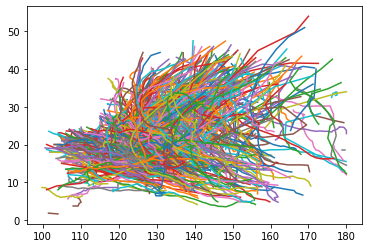

In [ ]:
for i in range(len(data['name'])):
  data1 = data.loc[data.name == 'typhoon_'+str(i), ['Latitude(N)', 'Longitude(E)']]
  plt.plot(data1['Longitude(E)'], data1['Latitude(N)'])

In [ ]:
# 시작점만 나타내기

data

,Date,Latitude(N),Longitude(E),Direction,Speed,name
0,2011-09-07,21.5,135.4,NNE,15.0,typhoon_1
1,2011-09-07,21.5,135.3,W,4.0,typhoon_1
2,2011-09-07,22.2,135.5,NNE,14.0,typhoon_1
3,2011-09-08,23.7,135.2,NNW,29.0,typhoon_1
4,2011-09-08,24.7,134.2,NW,26.0,typhoon_1
...,...,...,...,...,...,...
9434,2011-09-05,36.5,148.7,NW,33.0,typhoon_529
9435,2011-09-06,36.8,148.3,NW,9.0,typhoon_529
9436,2011-09-06,37.9,149.4,NE,27.0,typhoon_529
9437,2011-09-06,39.4,150.1,NNE,30.0,typhoon_529


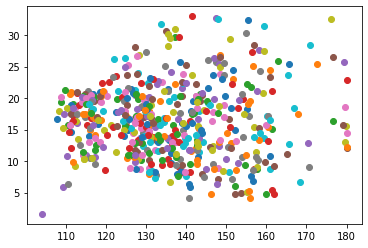

In [ ]:
import matplotlib.pyplot as plt

name_list = []
start_point = []

for i in range(len(data)):
  if data.iloc[i][5] not in name_list:
    plt.scatter(data.iloc[i][2], data.iloc[i][1])
    start_point.append([data.iloc[i][2], data.iloc[i][1]])
    name_list.append(data.iloc[i][5])

In [ ]:
target_point = start_point[153]
del start_point[153]

In [ ]:
target_list = []

In [ ]:
target_list.append(target_point)

In [ ]:
target_list

[[125.1, 15.4]]

In [ ]:
import numpy as np

length = []

for i in range(len(start_point)):
  leng = np.sqrt((target_point[0] - start_point[i][0]) ** 2 + (target_point[1] - start_point[i][1]) ** 2)
  length.append(leng)

In [ ]:
sorted_length = sorted(length)
index = []

for i in range(5): # k
  for j in range(len(length)):
    if sorted_length[i] == length[j]:
      index.append(j)

In [ ]:
del index[-3]
del index[11]
del index[19]
del index[21]
del index[22]

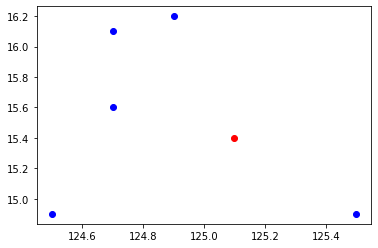

In [ ]:
plt.scatter(target_point[0], target_point[1], c='red')
for idx in index:
  plt.scatter(start_point[idx][0], start_point[idx][1], c='blue')

In [ ]:
for idx in index:
  print(name_list[idx])

typhoon_242
typhoon_11
typhoon_408
typhoon_118
typhoon_48


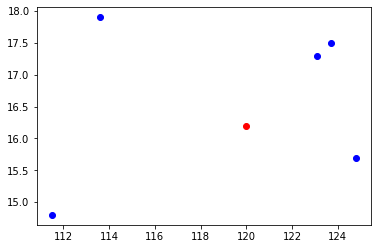

In [ ]:
plt.scatter(target_list[1][0], target_list[1][1], c = 'red')
for idx in index:
  data2 = data.loc[data.name == name_list[idx], ['Latitude(N)', 'Longitude(E)']]
  data2['index'] = [i for i in range(len(data2))]
  data2.set_index('index', inplace = True, drop = True)
  plt.scatter(data2['Longitude(E)'][2], data2['Latitude(N)'][2], c='blue')

In [ ]:

sum_N = 0
sum_E = 0

for idx in index:
  data2 = data.loc[data.name == name_list[idx], ['Latitude(N)', 'Longitude(E)']]
  data2['index'] = [i for i in range(len(data2))]
  data2.set_index('index', inplace = True, drop = True)
  sum_N += data2['Latitude(N)'][6]
  sum_E += data2['Longitude(E)'][6]

sum_N = round(sum_N / 5, 1)
sum_E = round(sum_E / 5, 1)
  

target_point = [sum_E, sum_N]
target_list.append(target_point)

KeyError: ignored

In [ ]:
target_list

[[125.1, 15.4],
 [120.0, 16.2],
 [119.3, 16.6],
 [118.2, 17.4],
 [117.2, 18.5],
 [116.8, 19.2]]

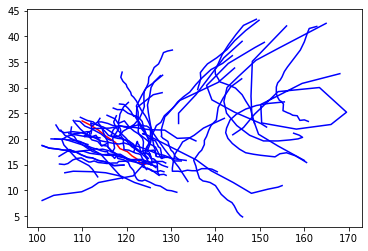

In [ ]:
data4 = data.loc[data.name == 'typhoon_154', ['Latitude(N)', 'Longitude(E)']]
plt.plot(data4['Longitude(E)'], data4['Latitude(N)'], c='red')

for idx in index:
  data1 = data.loc[data.name == name_list[idx], ['Latitude(N)', 'Longitude(E)']]
  plt.plot(data1['Longitude(E)'], data1['Latitude(N)'], c='blue')

In [ ]:
name_list[153]

'typhoon_154'

In [ ]:
data4 = data.loc[data.name == 'typhoon_154', ['Latitude(N)', 'Longitude(E)', 'Date']]
data4

,Latitude(N),Longitude(E),Date
3507,15.4,125.1,2017-08-25
3508,15.0,123.9,2017-08-25
3509,15.5,122.9,2017-08-25
3510,16.1,122.3,2017-08-25
3511,16.7,121.2,2017-08-26
3512,17.5,120.2,2017-08-26
3513,18.1,118.5,2017-08-26
3514,19.3,117.5,2017-08-26
3515,20.5,115.4,2017-08-27
3516,21.8,113.5,2017-08-27


In [ ]:
target_list

[[125.1, 15.4], [1337.5, 179.7], [133.7, 18.0], [133.7, 18.0]]

In [ ]:
sum_N = round(sum_N / 5, 1)
sum_N

In [ ]:
sum_N

3.24

In [ ]:
point_x = []
point_y = []

for point in target_list:
  point_x.append(point[0])
  point_y.append(point[1])

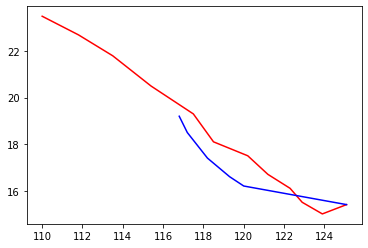

In [ ]:
data4 = data.loc[data.name == 'typhoon_154', ['Latitude(N)', 'Longitude(E)']]
plt.plot(data4['Longitude(E)'], data4['Latitude(N)'], c='red')
plt.plot(point_x, point_y, c='blue')

In [ ]:
for idx in index:
  print(data.loc[data.name==name_list[idx], ['Latitude(N)', 'Longitude(E)']])


In [ ]:
data4['indx'] = [i for i in range(len(data4))]
data4.set_index('indx', inplace = True, drop=True)

In [ ]:
real_point_x = list(data4['Latitude(N)'][:7])
real_point_y = list(data4['Longitude(E)'][:7])

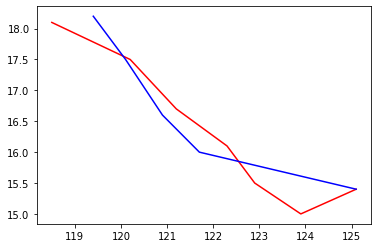

In [ ]:
plt.plot(real_point_y, real_point_x, c='red')
plt.plot(point_x, point_y, c='blue')

In [ ]:
del index[-3]

In [ ]:
index[23]

315

In [ ]:
index_choice = []
index_choice.append(11)

In [ ]:
index_choice.append(20)
index_choice.append(23)
index_choice.append(25)

In [ ]:
index_choice

[11, 20, 23, 25]

In [ ]:
for idx in index:
  print(data.loc[data.name==name_list[idx], ['Latitude(N)', 'Longitude(E)', 'Date']])

      Latitude(N)  Longitude(E)        Date
5244         17.7         116.0  2020-10-12
5245         18.0         114.6  2020-10-12
5246         17.9         113.6  2020-10-13
5247         18.3         112.1  2020-10-13
5248         18.6         111.3  2020-10-13
5249         19.1         110.5  2020-10-13
5250         19.5         109.1  2020-10-14
5251         19.8         107.6  2020-10-14
5252         19.8         106.6  2020-10-14
5253         20.0         105.6  2020-10-14
     Latitude(N)  Longitude(E)        Date
211         14.9         125.5  2012-06-01
212         15.3         125.3  2012-06-01
213         15.7         124.8  2012-06-02
214         16.6         124.2  2012-06-02
215         17.1         124.1  2012-06-02
216         17.5         124.3  2012-06-02
217         17.9         124.5  2012-06-03
218         18.6         124.7  2012-06-03
219         19.3         125.4  2012-06-03
220         20.1         125.6  2012-06-03
221         20.9         125.8  2012-06-04


In [ ]:
import numpy as np

In [ ]:
leng = 0

In [ ]:
a = 116.8
b = 19.2
c = 120.2
d = 17.5

In [ ]:
leng2 = (c-a) ** 2 + (d-b) ** 2

In [ ]:
leng += leng2

In [ ]:
leng /= 5

In [ ]:
leng3 = 23.557999999999996 * 5

In [ ]:
leng3

39.26333333333333

In [ ]:
leng * 5

83.01000000000009

In [ ]:
data4

,Latitude(N),Longitude(E)
3507,15.4,125.1
3508,15.0,123.9
3509,15.5,122.9
3510,16.1,122.3
3511,16.7,121.2
3512,17.5,120.2
3513,18.1,118.5
3514,19.3,117.5
3515,20.5,115.4
3516,21.8,113.5


# 6 데이터 준비

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/태풍/print_data2.csv')
data

,Unnamed: 0,Date,Latitude(N),Longitude(E),Central Pressure,M/s,Km/s,Wind radius,Itnensity,Size,Direction,Speed,70% Chance radius,name
0,0,2011-09-07,21.5,135.4,1000.0,18.0,65.0,100.0,1,1,NNE,15.0,0.0,typhoon_1
1,1,2011-09-07,21.5,135.3,1000.0,18.0,65.0,120.0,1,1,W,4.0,0.0,typhoon_1
2,2,2011-09-07,22.2,135.5,998.0,17.0,61.0,150.0,1,1,NNE,14.0,0.0,typhoon_1
3,3,2011-09-08,23.7,135.2,998.0,18.0,65.0,150.0,1,1,NNW,29.0,0.0,typhoon_1
4,4,2011-09-08,24.7,134.2,1000.0,18.0,65.0,150.0,1,1,NW,26.0,0.0,typhoon_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9434,9434,2011-09-05,36.5,148.7,994.0,21.0,76.0,250.0,1,1,NW,33.0,0.0,typhoon_529
9435,9435,2011-09-06,36.8,148.3,994.0,21.0,76.0,250.0,1,1,NW,9.0,0.0,typhoon_529
9436,9436,2011-09-06,37.9,149.4,994.0,21.0,76.0,250.0,1,1,NE,27.0,0.0,typhoon_529
9437,9437,2011-09-06,39.4,150.1,994.0,21.0,76.0,250.0,1,1,NNE,30.0,0.0,typhoon_529


In [ ]:
data = data[['Date', 'Latitude(N)', 'Longitude(E)', 'Itnensity', 'name']]

In [ ]:
data

,Date,Latitude(N),Longitude(E),Itnensity,name
0,2011-09-07,21.5,135.4,1,typhoon_1
1,2011-09-07,21.5,135.3,1,typhoon_1
2,2011-09-07,22.2,135.5,1,typhoon_1
3,2011-09-08,23.7,135.2,1,typhoon_1
4,2011-09-08,24.7,134.2,1,typhoon_1
...,...,...,...,...,...
9434,2011-09-05,36.5,148.7,1,typhoon_529
9435,2011-09-06,36.8,148.3,1,typhoon_529
9436,2011-09-06,37.9,149.4,1,typhoon_529
9437,2011-09-06,39.4,150.1,1,typhoon_529


In [ ]:
print('a')

a
